# Analysis

## Importing

### Importing Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from statsmodels.regression.rolling import RollingOLS

# to access Macro data
def FRED(code):
    fred_url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id='
    df = pd.read_csv(fred_url + code)
    if 'DATE' in df.columns:
        df['DATE'] = df.apply(lambda row: datetime.date.fromisoformat(row.DATE), axis=1)
        df['DATE'] = pd.to_datetime(df['DATE'])
        df.set_index('DATE', inplace=True)
    time.sleep(2)  # So that I don't get blocked through excessive requests
    return df

# to calculate percent differences correctly
def pct_diff(series: pd.Series, periods: int = 1) -> pd.Series:
    """
    Calculate the percent difference of a pandas series.

    Parameters
    ----------
    series : pandas.Series
        Input series to calculate percent difference from.
    periods : int, default=1
        Number of periods to shift the series by.

    Returns
    -------
    pandas.Series
        Series with percent difference from the shifted series.

    """
    shifted_series = series.shift(periods)
    rs = series / shifted_series.where(shifted_series >= 0, np.nan) - 1
    return rs

# to quickly make a correlation matrix heatmap
def correlmap(data):
    data_correlation = data.corr()    
    sns.heatmap(data_correlation, vmin=-1, vmax=1, cmap='coolwarm', annot=True)
    plt.show()
    display(pd.DataFrame(data_correlation.sum(), columns=['Sum of Correlations']))

### Importing Calculated Data

In [2]:
tdfs = pd.read_csv('../Data/regressions_results_2024-03-20.csv', 
                   dtype={
                       'gvkey': np.unicode_,
                       'datadate': np.unicode_,
                       'fyearq': 'float32',
                       'fqtr': 'float32',
                       'indfmt': np.unicode_,
                       'consol': np.unicode_,
                       'popsrc': np.unicode_,
                       'datafmt': np.unicode_,
                       'tic': np.unicode_,
                       'cusip': np.unicode_,
                       'conm': np.unicode_,
                       'curcdq': np.unicode_,
                       'datacqtr': np.unicode_,
                       'datafqtr': np.unicode_,
                       'naics': np.unicode_,
                       'sic': np.unicode_,
                       'ggroup': np.unicode_,
                       'gind': np.unicode_,
                       'gsector': np.unicode_,
                       'gsubind': np.unicode_,
                       'cik': np.unicode_,
                       'costat': np.unicode_,
                       'actq': 'float64',
                       'atq': 'float64',
                       'ceqq': 'float64',
                       'chq': 'float64',
                       'cshfdq': 'float64',
                       'cshoq': 'float64',
                       'cshprq': 'float64',
                       'dlcq': 'float64',
                       'dlttq': 'float64',
                       'dpactq': 'float64',
                       'dpq': 'float64',
                       'icaptq': 'float64',
                       'lctq': 'float64',
                       'niq': 'float64',
                       'oiadpq': 'float64',
                       'oibdpq': 'float64',
                       'piq': 'float64',
                       'revtq': 'float64',
                       'teqq': 'float64',
                       'txtq': 'float64',
                       'xintq': 'float64',
                       'xrdq': 'float64',
                       'dvy': 'float64',
                       'cik': 'float64',
                       'mktvalq': 'float64',
                       'prccq': 'float64', 
                       'tid': np.unicode_,
                       'qid': np.unicode_,
                       'beta': np.float64,
                       'beta_se': np.float64,
                       'alpha': np.float64,
                       'alpha_se': np.float64,
                       'r2': np.float64,
                       'DGS1': np.float64,
                       'rfr': np.float64,
                       'Market_Cap': np.float64,
                       'Cash': np.float64,
                       'Debt': np.float64,
                       'Net_Debt': np.float64,
                       'Long_Term_Debt': np.float64,
                       'Enterprise_Value': np.float64,
                       'Current_Assets': np.float64,
                       'Current_Liabilities': np.float64,
                       'Current_Liabilities_minus_ST_Debt': np.float64,
                       'Current_Ratio': np.float64,
                       'Common_Equity': np.float64,
                       'NI': np.float64,
                       'Pretax_Income': np.float64,
                       'EBIT': np.float64,
                       'EBITDA': np.float64,
                       'Taxes': np.float64,
                       'Tax_Rate': np.float64,
                       'Revenue': np.float64,
                       'NOPAT': np.float64,
                       'Total_Costs': np.float64,
                       'Total_Costs_inc_t': np.float64,
                       'RnD': np.float64,
                       'Assets': np.float64,
                       'Invested_Capital': np.float64,
                       'tobins_q': np.float64,
                       'EBIT_margin': np.float64,
                       'ROIC': np.float64,
                       'ROA': np.float64,
                       'ROE': np.float64,
                       'beta_ul': np.float64,
                       'RR': np.float64,
                       'qRR': np.float64,
                       'RRIC': np.float64,
                       'RREV': np.float64,
                       'Excess_Profit': np.float64,
                       'Total_Costs_inc_RRIC': np.float64,
                       'Total_Costs_inc_RREV': np.float64,
                       'Market_Cap_Growth': np.float64,
                       'Enterprise_Value_Growth': np.float64,
                       'EBIT_Growth': np.float64,
                       'Revenue_Growth': np.float64,
                       'Total_Costs_Growth': np.float64,
                       'Total_Costs_inc_t_Growth': np.float64,
                       'Assets_Growth': np.float64,
                       'Invested_Capital_Growth': np.float64,
                       'tobins_q_Growth': np.float64,
                       'ROIC_Growth': np.float64,
                       'ROA_Growth': np.float64,
                       'RRIC_Growth': np.float64,
                       'RREV_Growth': np.float64,
                       'Excess_Profit_Growth': np.float64,
                       'Total_Costs_inc_RRIC_Growth': np.float64,
                       'naics1': np.unicode_,
                       'naics2': np.unicode_,
                       'naics3': np.unicode_,
                       'naics4': np.unicode_,
                       'naics5': np.unicode_,
                       'naics6': np.unicode_,
                       'mktshare1': np.float64,
                       'mktshare2': np.float64,
                       'mktshare3': np.float64,
                       'mktshare4': np.float64,
                       'mktshare5': np.float64,
                       'mktshare6': np.float64,
                       'hhi1': np.float64,
                       'hhi2': np.float64,
                       'hhi3': np.float64,
                       'hhi4': np.float64,
                       'hhi5': np.float64,
                       'hhi6': np.float64,
                       'tobins_q_agg': np.float64,
                       'ROIC_agg': np.float64,
                       'ROA_agg': np.float64,
                       'RR_agg': np.float64,
                       '?': np.float64,
                       'price_cost_margin': np.float64,
                       'price_cost_margin_se': np.float64,
                       'price_cost_margin_na': np.float64,
                       'lerner': np.float64,
                       'lerner_se': np.float64,
                       'lerner_na': np.float64,
                       'mroic': np.float64,
                       'mroic_se': np.float64,
                       'mroic_na': np.float64,
                       'ar_coef': np.float64,
                       'ar_coef_se': np.float64,
                       'ar_int': np.float64,
                       'ar_int_se': np.float64,
                       'ar_na': np.float64
                   }, index_col=0
                  )
tdfs['datadate'] = pd.to_datetime(tdfs.datadate)
tdfs['cyear'] = tdfs.datadate.apply(lambda row: row.year)

In [3]:
def hirshherf(x):
    x /= x.sum()
    x = x * x
    return x.sum()

def mktshare(x):
    return x / x.sum()

gsubindmktshare = tdfs[tdfs.Revenue > 0][['datacqtr', 'gsubind', 'Revenue']].groupby(['datacqtr', 'gsubind']).transform(mktshare)
gsubindhhi = tdfs[tdfs.Revenue > 0][['datacqtr', 'gsubind', 'Revenue']].groupby(['datacqtr', 'gsubind']).transform(hirshherf)

tdfs.drop(columns=['hhi_gsubind', 'mktshare_gsubind'], inplace=True)
tdfs = tdfs.merge(gsubindmktshare.Revenue.rename('mktshare_gsubind'), left_index=True, right_index=True, how='outer')
tdfs = tdfs.merge(gsubindhhi.Revenue.rename('hhi_gsubind'), left_index=True, right_index=True, how='outer')


naicsmktshare = tdfs[tdfs.Revenue > 0][['datacqtr', 'naics4', 'Revenue']].groupby(['datacqtr', 'naics4']).transform(mktshare)
naicshhi = tdfs[tdfs.Revenue > 0][['datacqtr', 'naics4', 'Revenue']].groupby(['datacqtr', 'naics4']).transform(hirshherf)

tdfs.drop(columns=['hhi4', 'mktshare4'], inplace=True)
tdfs = tdfs.merge(naicsmktshare.Revenue.rename('mktshare4'), left_index=True, right_index=True, how='outer')
tdfs = tdfs.merge(naicshhi.Revenue.rename('hhi4'), left_index=True, right_index=True, how='outer')


List of current public firms
(have a beta from 2Q23)

In [4]:
current_public_gvkeys = tdfs[tdfs.datacqtr == '2023Q2'][['beta','gvkey']].dropna().gvkey.unique()
print('Total dataframe:', tdfs.gvkey.nunique(), 'firms;', len(tdfs), 'observations')
print('Currently public:', len(current_public_gvkeys), 'firms;', len(tdfs[tdfs.gvkey.isin(current_public_gvkeys)]))

Total dataframe: 28721 firms; 1432601 observations
Currently public: 4106 firms; 399976


## Data Transformation

### Line Items Dataframe

    line_items = set(tdfs.columns)

    #irrelevant_columns = ['tic','cshprq','datafmt','datacqtr','datafqtr','conm','popsrc','beta','costat','gvkey']
    #for irrelevant_colname in irrelevant_columns:
    #    line_items.remove(irrelevant_colname)

    quarters = tdfs.datacqtr.unique()
    quarters.sort()

    data = pd.pivot_table(tdfs, values=line_items, index='datacqtr', columns='gvkey')

## Main Filtering

Most basic filtering

- Revenue greater than 0
- Valid CAPM Beta (not `na`, standard error is not `na` or 0 or infinity)
- Market capitalization greater than 0
- not from 2023

In [5]:
tdfs = tdfs[
    (tdfs.Revenue > 0) & \
    (tdfs.beta.isnull() == False) & \
    (tdfs.beta_se.isnull() == False) & \
    (tdfs.beta_se != 0) & \
    (np.isinf(tdfs.beta_se) == False) & \
    (tdfs.Market_Cap > 0) & \
    (tdfs.datadate < np.datetime64('2023-01-01'))
].copy()

folder = 'Unfiltered Histograms'

print('Total Applicable Firms:',tdfs.gvkey.nunique(), ';  Observations:', len(tdfs))
print('Total Current Public Applicable Firms:',tdfs[tdfs.gvkey.isin(current_public_gvkeys)].gvkey.nunique(), 
      ';  Observations:', len(tdfs[tdfs.gvkey.isin(current_public_gvkeys)]))

Total Applicable Firms: 11879 ;  Observations: 419238
Total Current Public Applicable Firms: 3737 ;  Observations: 206040


Additional filtering for

- Assets greater than zero
- EBIT Margin within 10th to 90th percentiles for that quarter
- Lerner within 10th to 90th percentiles for that quarter
- Price-Cost Margin within 10th to 90th percentiles for that quarter
- Unlevered CAPM betas 10th to 90th percentiles for that quarter
- Market Capitalization above $25 million

In [6]:
p_min_beta = 0.05
p_max_beta = 0.95
beta_min_percentile = tdfs[['datacqtr','beta_ul']].groupby('datacqtr').quantile(p_min_beta)
beta_max_percentile = tdfs[['datacqtr','beta_ul']].groupby('datacqtr').quantile(p_max_beta)

p_min_ebit_margin = 0.05
p_max_ebit_margin = 0.95
ebit_min_percentile = tdfs[['datacqtr','EBIT_margin']].groupby('datacqtr').quantile(p_min_ebit_margin)
ebit_max_percentile = tdfs[['datacqtr','EBIT_margin']].groupby('datacqtr').quantile(p_max_ebit_margin)

p_min_pcm = 0.05
p_max_pcm = 0.95
pcm_min_percentile = tdfs[['datacqtr','price_cost_margin']].groupby('datacqtr').quantile(p_min_pcm)
pcm_max_percentile = tdfs[['datacqtr','price_cost_margin']].groupby('datacqtr').quantile(p_max_pcm)

p_min_lerner = 0.05
p_max_lerner = 0.95
lerner_min_percentile = tdfs[['datacqtr','lerner']].groupby('datacqtr').quantile(p_min_lerner)
lerner_max_percentile = tdfs[['datacqtr','lerner']].groupby('datacqtr').quantile(p_max_lerner)

#p_mktcap = 0.25
#mktcaps_percentile = tdfs[['datacqtr','Market_Cap']].groupby('datacqtr').quantile(.25)

#tdfs = pd.merge(
#    tdfs, 
#    mktcaps_percentile, 
#    left_on='datacqtr', 
#    right_index=True, 
#    suffixes=('','_' + str(round(p_mktcap * 100)) + 'p')
#)

tdfs = pd.merge(
    tdfs, 
    beta_min_percentile, 
    left_on='datacqtr', 
    right_index=True, 
    suffixes=('','_' + str(round(p_min_beta * 100)) + 'p')
)

tdfs = pd.merge(
    tdfs, 
    beta_max_percentile, 
    left_on='datacqtr', 
    right_index=True, 
    suffixes=('','_' + str(round(p_max_beta * 100)) + 'p')
)

tdfs = pd.merge(
    tdfs, 
    ebit_min_percentile, 
    left_on='datacqtr', 
    right_index=True, 
    suffixes=('','_' + str(round(p_min_ebit_margin * 100)) + 'p')
)

tdfs = pd.merge(
    tdfs, 
    ebit_max_percentile, 
    left_on='datacqtr', 
    right_index=True, 
    suffixes=('','_' + str(round(p_max_ebit_margin * 100)) + 'p')
)

tdfs = pd.merge(
    tdfs, 
    pcm_min_percentile, 
    left_on='datacqtr', 
    right_index=True, 
    suffixes=('','_' + str(round(p_min_pcm * 100)) + 'p')
)

tdfs = pd.merge(
    tdfs, 
    pcm_max_percentile, 
    left_on='datacqtr', 
    right_index=True, 
    suffixes=('','_' + str(round(p_max_pcm * 100)) + 'p')
)

tdfs = pd.merge(
    tdfs, 
    lerner_min_percentile, 
    left_on='datacqtr', 
    right_index=True, 
    suffixes=('','_' + str(round(p_min_lerner * 100)) + 'p')
)

tdfs = pd.merge(
    tdfs, 
    lerner_max_percentile, 
    left_on='datacqtr', 
    right_index=True, 
    suffixes=('','_' + str(round(p_max_lerner * 100)) + 'p')
)

In [7]:
#See how many observations we're dropping and where

test_filters = [
    (tdfs.Assets > 0),
    (tdfs.Market_Cap >= 10),
    (tdfs.datadate > np.datetime64('2011-12-31')) & (tdfs.datacqtr != '2011Q4'),
    (tdfs.EBIT_margin < tdfs['EBIT_margin_' + str(round(p_max_ebit_margin * 100)) + 'p']) & \
    (tdfs.EBIT_margin > tdfs['EBIT_margin_' + str(round(p_min_ebit_margin * 100)) + 'p']),
    (tdfs.beta_ul < tdfs['beta_ul_' + str(round(p_max_beta * 100)) + 'p']) & \
    (tdfs.beta_ul > tdfs['beta_ul_' + str(round(p_min_beta * 100)) + 'p']),
    (tdfs.lerner < tdfs['lerner_' + str(round(p_max_lerner * 100)) + 'p']) & \
    (tdfs.lerner > tdfs['lerner_' + str(round(p_min_lerner * 100)) + 'p']),
    (tdfs.price_cost_margin < tdfs['price_cost_margin_' + str(round(p_max_pcm * 100)) + 'p']) & \
    (tdfs.price_cost_margin > tdfs['price_cost_margin_' + str(round(p_min_pcm * 100)) + 'p'])
]

for i, f in enumerate(test_filters):
    temp_num_firms = tdfs[f].gvkey.nunique()
    temp_num_obs = len(tdfs[f])
    print('Filter', i, ':  ', temp_num_firms, 'firms', temp_num_obs, 'observations')

Filter 0 :   11862 firms 416014 observations
Filter 1 :   11063 firms 375491 observations
Filter 2 :   6547 firms 159891 observations
Filter 3 :   11336 firms 371245 observations
Filter 4 :   7350 firms 210332 observations
Filter 5 :   3854 firms 88423 observations
Filter 6 :   10064 firms 313099 observations


In [8]:
# Making the filter
main_filter = (
    #(tdfs.Tax_Rate != 0) & \
    (tdfs.datadate > np.datetime64('2011-12-31')) & (tdfs.datacqtr != '2011Q4') & \
    (tdfs.Assets > 0) & \
    (tdfs.EBIT_margin < tdfs['EBIT_margin_' + str(round(p_max_ebit_margin * 100)) + 'p']) & \
    (tdfs.EBIT_margin > tdfs['EBIT_margin_' + str(round(p_min_ebit_margin * 100)) + 'p']) & \
    (tdfs.beta_ul < tdfs['beta_ul_' + str(round(p_max_beta * 100)) + 'p']) & \
    (tdfs.beta_ul > tdfs['beta_ul_' + str(round(p_min_beta * 100)) + 'p']) & \
    (tdfs.lerner < tdfs['lerner_' + str(round(p_max_lerner * 100)) + 'p']) & \
    (tdfs.lerner > tdfs['lerner_' + str(round(p_min_lerner * 100)) + 'p']) & \
    (tdfs.price_cost_margin < tdfs['price_cost_margin_' + str(round(p_max_pcm * 100)) + 'p']) & \
    (tdfs.price_cost_margin > tdfs['price_cost_margin_' + str(round(p_min_pcm * 100)) + 'p']) & \
    (tdfs.Market_Cap > 25) &\
    (tdfs.lerner_na == 0) & (tdfs.price_cost_margin_na == 0)
)

In [9]:
print('Total Applicable Firms (Filtered):',tdfs[main_filter].gvkey.nunique(), ';  Observations:', len(tdfs[main_filter]))
print('Total Current Public Applicable Firms (Filtered):',
      tdfs[tdfs.gvkey.isin(current_public_gvkeys) & main_filter].gvkey.nunique(), 
      ';  Observations:', len(tdfs[tdfs.gvkey.isin(current_public_gvkeys) & main_filter]))

Total Applicable Firms (Filtered): 2963 ;  Observations: 60993
Total Current Public Applicable Firms (Filtered): 1874 ;  Observations: 47582


In [10]:
# applying the filter

#if input("Are you sure you want to apply the filter [Y/N]?").strip().lower() == "y":
#    folder = 'Filtered Histograms'
#    tdfs = tdfs[main_filter].copy()
#    print('Filter APPLIED. You are now working with a smaller dataset.')
#else:
#    print('Filter not applied.')
#    



folder = 'Robustness Histograms'
tdfs = tdfs[main_filter].copy()
print('ROBUSTNESS Filter APPLIED. You are now working with a smaller dataset.')


print('Total Applicable Firms (Filtered):',tdfs.gvkey.nunique(), ';  Observations:', len(tdfs))
print('Total Current Public Applicable Firms (Filtered):',tdfs[tdfs.gvkey.isin(current_public_gvkeys)].gvkey.nunique(), 
      ';  Observations:', len(tdfs[tdfs.gvkey.isin(current_public_gvkeys)]))

ROBUSTNESS Filter APPLIED. You are now working with a smaller dataset.
Total Applicable Firms (Filtered): 2963 ;  Observations: 60993
Total Current Public Applicable Firms (Filtered): 1874 ;  Observations: 47582


In [11]:
tdfs.sort_values('datadate', inplace=True, ascending=True)
shifteds = tdfs[['gvkey','alpha','lerner','price_cost_margin']].groupby('gvkey').shift(-20)
shifteds.columns = ['alpha_5yf', 'lerner_5yf', 'price_cost_margin_5yf']
tdfs = pd.merge(tdfs, shifteds, how='outer', left_index=True, right_index=True)

## Charting

In [13]:
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['font.family'] = 'NewComputerModern10Book'
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['ytick.left'] = False

def comma(x, pos):
    return f'{x:,.0f}'

#plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

In [14]:
len(tdfs)

60993

### Histograms

#### Industry Representation

In [ ]:
industries = {
    '11': 'Agriculture & Forestry',
    '21': 'Mining',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade',
    '45': 'Retail Trade',
    '48': 'Logistics',
    '49': 'Logistics',
    '51': 'Information',
    '52': 'Finance & Insurance',
    '53': 'Real Estate Leasing',
    '54': 'Professional Services',
    #'55': 'Management of Firms',
    '56': 'Admin. & Waste Services',
    '61': 'Educational Services',
    '62': 'Health Care & Social',
    '71': 'Entertainment & Rec.',
    '72': 'Accomodation & Food',
    '81': 'Other Services',
    '99': 'Nonclassifiable'
}

firms_industries = tdfs[['gvkey','naics2', 'beta_ul']].groupby('gvkey').first().groupby('naics2').count().sort_index(ascending=False)
quarters_industries = tdfs[['beta_ul','naics2']].groupby('naics2').count().sort_index(ascending=False)

fig, ax = plt.subplots(figsize=(11.5, 5.5))
plt.subplots_adjust(left=0.23, right=0.95, top=1, bottom=0.1)

firm_count_dict = {}
for k in list(industries.keys()):
    if industries[k] not in list(firm_count_dict.keys()):
        firm_count_dict[industries[k]] = firms_industries.beta_ul.loc[k]
    else:
        firm_count_dict[industries[k]] += firms_industries.beta_ul.loc[k]


ax.barh(list(firm_count_dict.keys()), list(firm_count_dict.values()), color='blue', edgecolor='black')
#ax.set_yticks(list(firm_count_dict.keys()))
#ax.set_yticklabels(list(industries.values()))
ax.set_xlabel('Number of Firms')
#ax[1].barh(quarters_industries.index, quarters_industries.beta_ul, color='blue', edgecolor='black')
#ax[1].set_yticks(list(industries.keys()))
#ax[1].set_yticklabels(list(industries.values()))

plt.savefig(folder + '/industries_representation.svg', transparent=True)
plt.show()


# FOR PAPER
# Times New Roman font (or XITS)

matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 11

fig, ax = plt.subplots(figsize=(6.5, 3.5))
plt.subplots_adjust(left=0.26, right=0.95, top=1, bottom=0.15)

firm_count_dict = {}
for k in list(industries.keys()):
    if industries[k] not in list(firm_count_dict.keys()):
        firm_count_dict[industries[k]] = firms_industries.beta_ul.loc[k]
    else:
        firm_count_dict[industries[k]] += firms_industries.beta_ul.loc[k]


ax.barh(list(firm_count_dict.keys()), list(firm_count_dict.values()), color='blue', edgecolor='black')
#ax.set_yticks(list(firm_count_dict.keys()))
#ax.set_yticklabels(list(industries.values()))
ax.set_xlabel('Number of Firms')
#ax[1].barh(quarters_industries.index, quarters_industries.beta_ul, color='blue', edgecolor='black')
#ax[1].set_yticks(list(industries.keys()))
#ax[1].set_yticklabels(list(industries.values()))

plt.savefig(folder + '/For Paper/industries_representation.svg', transparent=True)
plt.show()

matplotlib.rcParams['font.family'] = 'NewComputerModern10Book'
matplotlib.rcParams['font.size'] = 16

In [ ]:
industries = {
    '11': 'Agriculture & Forestry',
    '21': 'Mining',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade',
    '45': 'Retail Trade',
    '48': 'Logistics',
    '49': 'Logistics',
    '51': 'Information',
    '52': 'Finance & Insurance',
    '53': 'Real Estate Leasing',
    '54': 'Professional Services',
    #'55': 'Management of Firms',
    '56': 'Admin. & Waste Services',
    '61': 'Educational Services',
    '62': 'Health Care & Social',
    '71': 'Entertainment & Rec.',
    '72': 'Accomodation & Food',
    '81': 'Other Services',
    '99': 'Nonclassifiable'
}

fig, ax = plt.subplots(figsize=(11.5, 5.5))
plt.subplots_adjust(left=0.23, right=0.95, top=1, bottom=0.1)

firms_industries = tdfs[tdfs.gvkey.isin(current_public_gvkeys)][['gvkey','naics2', 'beta_ul']].groupby('gvkey').first().groupby('naics2').count().sort_index(ascending=False)
quarters_industries = tdfs[['beta_ul','naics2']].groupby('naics2').count().sort_index(ascending=False)

firm_count_dict = {}
for k in list(industries.keys()):
    if industries[k] not in list(firm_count_dict.keys()):
        firm_count_dict[industries[k]] = firms_industries.beta_ul.loc[k]
    else:
        firm_count_dict[industries[k]] += firms_industries.beta_ul.loc[k]


ax.barh(list(firm_count_dict.keys()), list(firm_count_dict.values()), color='blue', edgecolor='black')
#ax.set_yticks(list(firm_count_dict.keys()))
#ax.set_yticklabels(list(industries.values()))
ax.set_xlabel('Number of Firms')
#ax[1].barh(quarters_industries.index, quarters_industries.beta_ul, color='blue', edgecolor='black')
#ax[1].set_yticks(list(industries.keys()))
#ax[1].set_yticklabels(list(industries.values()))

plt.savefig(folder + '/current_public_industries_representation.svg', transparent=True)
plt.show()

#### Market Cap

,Market_Cap
count,6.099300e+04
mean,1.496697e+04
std,6.655086e+04
min,2.500344e+01
25%,3.798450e+02
50%,1.975091e+03
75%,8.744086e+03
max,2.933331e+06


NameError: name 'comma' is not defined

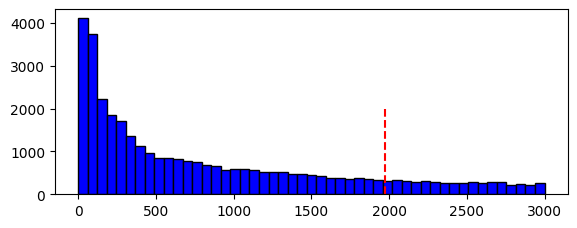

In [12]:
series = tdfs.Market_Cap

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/mkt_cap.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(0,3000,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=2000, color='red', ls='--')
plt.xticks(np.linspace(0,3000,7))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Market Capitalization (millions)')

plt.savefig(folder + '/mkt_cap.svg', transparent=True)
plt.show()

In [ ]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].Market_Cap

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_mkt_cap.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(0,3000,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=2000, color='red', ls='--')
plt.xticks(np.linspace(0,3000,7))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Market Capitalization (millions)')

plt.savefig(folder + '/current_public_mkt_cap.svg', transparent=True)
plt.show()

In [ ]:
if folder == 'Filtered Histograms':
    fig, ax = plt.subplots(figsize=(6.75,5.33))
    plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
    ax.set_title(str(round(p_mktcap * 100)) + 'th Percentile Market Capitalization (millions)')
    ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
    #ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
    ax.plot(tdfs[['datadate','Market_Cap_' + str(round(p_mktcap * 100)) + 'p']].groupby('datadate').first(), color='blue')
    #ax.set_xticks([
    #    np.datetime64('1980-01-01'),
    #    np.datetime64('1990-01-01'),
    #    np.datetime64('2000-01-01'),
    #    np.datetime64('2010-01-01'),
    #    np.datetime64('2020-01-01'),
    #])
    plt.savefig('Filtered Histograms/MktCap_percentile.svg')
    plt.show()

In [ ]:
print(len(tdfs[tdfs.datadate >= np.datetime64('2012-01-01')]))

tdfs[tdfs.datadate >= np.datetime64('2012-01-01')][['datacqtr', 'gvkey']].groupby('datacqtr').count().tail(60)

#### Beta (Levered)

In [ ]:
series = tdfs.beta

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/beta.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.5,2.5,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=3000, color='red', ls='--')
plt.xticks(np.linspace(-0.5,2.5,7))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Beta (levered)')

plt.savefig(folder + '/beta_levered.svg', transparent=True)
plt.show()

In [ ]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].beta

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_beta.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.5,2.5,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=3000, color='red', ls='--')
plt.xticks(np.linspace(-0.5,2.5,7))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Beta (levered)')

plt.savefig(folder + '/current_public_beta_levered.svg', transparent=True)
plt.show()

#### Beta (Unlevered)

In [ ]:
series = tdfs.beta_ul

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/beta_unlevered.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.5,2.5,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=3000, color='red', ls='--')
plt.xticks(np.linspace(-0.5,2.5,7))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Beta (unlevered)')

plt.savefig(folder + '/beta_unlevered.svg', transparent=True)
plt.show()

In [ ]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].beta_ul

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_beta_unlevered.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.5,2.5,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=3000, color='red', ls='--')
plt.xticks(np.linspace(-0.5,2.5,7))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Beta (unlevered)')

plt.savefig(folder + '/current_public_beta_unlevered.svg', transparent=True)
plt.show()

#### Tax Rate

In [ ]:
series = tdfs.Tax_Rate

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/tax_rate.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.25,0.75,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=3000, color='red', ls='--')
plt.xticks(np.linspace(-0.25,.75,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Tax Rate')

plt.savefig(folder + '/tax_rate.svg', transparent=True)
plt.show()

In [ ]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].Tax_Rate

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_pubic_tax_rate.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.25,0.75,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=3000, color='red', ls='--')
plt.xticks(np.linspace(-0.25,.75,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Tax Rate')

plt.savefig(folder + '/current_public_tax_rate.svg', transparent=True)
plt.show()

#### Required Return

In [ ]:
series = tdfs.RR

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/required_return_annual.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.125,0.25,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=5000, color='red', ls='--')
plt.xticks(np.linspace(-0.125,0.25,4))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Required Return')

plt.savefig(folder + '/required_return_annual.svg', transparent=True)
plt.show()

In [ ]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].RR

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_required_return_annual.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.125,0.25,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=5000, color='red', ls='--')
plt.xticks(np.linspace(-0.125,0.25,4))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Required Return')

plt.savefig(folder + '/current_public_required_return_annual.svg', transparent=True)
plt.show()

#### Quarterly Required Return

In [ ]:
series = tdfs.qRR

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/required_return_quarterly.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.025,0.075,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=6000, color='red', ls='--')
plt.xticks(np.linspace(-0.025,0.075,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Quarterly Required Return')

plt.savefig(folder + '/required_return_quarterly.svg', transparent=True)
plt.show()

In [ ]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].qRR

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_required_return_quarterly.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.025,0.075,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=6000, color='red', ls='--')
plt.xticks(np.linspace(-0.025,0.075,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Quarterly Required Return')

plt.savefig(folder + '/current_public_required_return_quarterly.svg', transparent=True)
plt.show()

#### Lerner

In [ ]:
series = tdfs.lerner

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/lerner.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.5,0.5,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=4000, color='red', ls='--')
plt.xticks(np.linspace(-0.5,0.5,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Lerner Index')

plt.savefig(folder + '/lerner.svg', transparent=True)
plt.show()

In [ ]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].lerner

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_lerner.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.5,0.5,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=4000, color='red', ls='--')
plt.xticks(np.linspace(-0.5,0.5,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Lerner Index')

plt.savefig(folder + '/current_public_lerner.svg', transparent=True)
plt.show()

#### Price-Cost Margin

In [ ]:
series = tdfs.price_cost_margin

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/price_cost_margin.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.5,1.5,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=7000, color='red', ls='--')
plt.xticks(np.linspace(-0.5,1.5,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Price-Cost Margin')

plt.savefig(folder + '/price_cost_margin.svg', transparent=True)
plt.show()

In [ ]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].price_cost_margin

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_price_cost_margin.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.5,1.5,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=7000, color='red', ls='--')
plt.xticks(np.linspace(-0.5,1.5,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Price-Cost Margin')

plt.savefig(folder + '/current_public_price_cost_margin.svg', transparent=True)
plt.show()

#### EBIT Margin

In [ ]:
series = tdfs.EBIT_margin

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/ebit_margin.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.5,0.5,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=5000, color='red', ls='--')
plt.xticks(np.linspace(-0.5,0.5,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('EBIT Margin')

plt.savefig(folder + '/ebit_margin.svg', transparent=True)
plt.show()

In [ ]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].EBIT_margin

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_ebit_margin.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.5,0.5,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=5000, color='red', ls='--')
plt.xticks(np.linspace(-0.5,0.5,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('EBIT Margin')

plt.savefig(folder + '/current_public_ebit_margin.svg', transparent=True)
plt.show()

#### ROIC

In [ ]:
series = tdfs.ROIC

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/roic_quarterly.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.05,0.1,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=5000, color='red', ls='--')
plt.xticks(np.linspace(-0.05,0.1,7))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('ROIC')

plt.savefig(folder + '/roic_quarterly.svg', transparent=True)
plt.show()

In [ ]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].ROIC

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_roic_quarterly.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.05,0.1,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=5000, color='red', ls='--')
plt.xticks(np.linspace(-0.05,0.1,7))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('ROIC')

plt.savefig(folder + '/current_public_roic_quarterly.svg', transparent=True)
plt.show()

#### Marginal ROIC

In [ ]:
series = tdfs.mroic

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/marginal_roic_quarterly.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.1,0.15,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=5000, color='red', ls='--')
plt.xticks(np.linspace(-0.1,0.15,6))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Marginal ROIC')

plt.savefig(folder + '/marginal_roic_quarterly.svg', transparent=True)
plt.show()

In [ ]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].mroic

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_marginal_roic_quarterly.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-0.1,0.15,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=5000, color='red', ls='--')
plt.xticks(np.linspace(-0.1,0.15,6))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Marginal ROIC')

plt.savefig(folder + '/current_public_marginal_roic_quarterly.svg', transparent=True)
plt.show()

#### Profits Autoregression Index (π) 

In [ ]:
series = tdfs.ar_coef

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/marginal_roic_quarterly.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=5000, color='red', ls='--')
plt.xticks(np.linspace(0,1,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title("Muller’s AR Coefficient")

plt.savefig(folder + '/ar_coef_quarterly.svg', transparent=True)
plt.show()

In [ ]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].ar_coef

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_marginal_roic_quarterly.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=5000, color='red', ls='--')
plt.xticks(np.linspace(0,1,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title("Muller’s AR Coefficient")

plt.savefig(folder + '/current_public_ar_coef_quarterly.svg', transparent=True)
plt.show()

#### Tobin's q

In [ ]:
series = tdfs.tobins_q

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/tobins_q.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-1,6,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=7000, color='red', ls='--')
plt.xticks(np.linspace(-1,6,8))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Tobin’s q')

plt.savefig(folder + '/tobins_q.svg', transparent=True)
plt.show()

In [ ]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].tobins_q

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_tobins_q.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(-1,6,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=7000, color='red', ls='--')
plt.xticks(np.linspace(-1,6,8))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Tobin’s q')

plt.savefig(folder + '/current_public_tobins_q.svg', transparent=True)
plt.show()

#### Market Share

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(11.5, 5.5))
plt.subplots_adjust(hspace=0.4, wspace=0.5)

for i in range(2, 7, 2):
    series = tdfs['mktshare' + str(i)]
    #print((i-1)//3, (i-1)%3)
    #display(series.describe())
    ax[i//2 - 1].hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
    ax[i//2 - 1].vlines(series.median(), ymin=0, ymax=25_000, color='red', ls='--')
    ax[i//2 - 1].set_xticks(np.linspace(0,1,5))
    ax[i//2 - 1].set_yticks(np.linspace(0,25_000,3))
    #ax[(i-1)//2, (i-1)%2].set_ylim(0, 50_000)
    ax[i//2 - 1].set_xlim(0, 1)
    ax[i//2 - 1].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
    ax[i//2 - 1].set_title('Market Share (NAICS '+str(i)+')')
    
plt.savefig(folder + '/market_share.svg', transparent=True)
plt.show()

In [ ]:
tdfs.mktshare4.describe()

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(11.5, 5.5))
plt.subplots_adjust(hspace=0.4, wspace=0.5)

for i in range(1, 7, 2):
    series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)]['mktshare' + str(i)]
    #print((i-1)//3, (i-1)%3)
    #display(series.describe())
    ax[(i-1)//3, (i-1)%3].hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
    ax[(i-1)//3, (i-1)%3].vlines(series.median(), ymin=0, ymax=25_000, color='red', ls='--')
    ax[(i-1)//3, (i-1)%3].set_xticks(np.linspace(0,1,5))
    ax[(i-1)//3, (i-1)%3].set_yticks(np.linspace(0,25_000,3))
    #ax[(i-1)//2, (i-1)%2].set_ylim(0, 50_000)
    ax[(i-1)//3, (i-1)%3].set_xlim(0, 1)
    ax[(i-1)//3, (i-1)%3].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
    ax[(i-1)//3, (i-1)%3].set_title('Market Share (NAICS '+str(i)+')')
    
plt.savefig(folder + '/current_public_market_share.svg', transparent=True)
plt.show()

#### Market Share 4

In [ ]:
series = tdfs.mktshare4

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/mktshare4.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=24000, color='red', ls='--')
plt.xticks(np.linspace(0,1,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Market Share (NAICS 4)')

plt.savefig(folder + '/mktshare4.svg', transparent=True)
plt.show()

In [ ]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].mktshare4

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_mktshare4.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=24000, color='red', ls='--')
plt.xticks(np.linspace(0,1,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('Market Share (NAICS 4)')

plt.savefig(folder + '/current_public_mktshare4.svg', transparent=True)
plt.show()

#### Hirshman-Herfindahl Index

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(11.5, 5.5))
plt.subplots_adjust(hspace=0.4, wspace=0.5)

for i in range(1, 7, 1):
    series = tdfs['hhi' + str(i)]
    #print('\nHHI', 1)
    #display(series.describe())
    ax[(i-1)//3, (i-1)%3].hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
    ax[(i-1)//3, (i-1)%3].vlines(series.median(), ymin=0, ymax=10_000, color='red', ls='--')
    ax[(i-1)//3, (i-1)%3].set_xticks(np.linspace(0,1,5))
    ax[(i-1)//3, (i-1)%3].set_yticks(np.linspace(0,10_000,3))
    #ax[(i-1)//2, (i-1)%2].set_ylim(0, 50_000)
    ax[(i-1)//3, (i-1)%3].set_xlim(0, 1)
    ax[(i-1)//3, (i-1)%3].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
    ax[(i-1)//3, (i-1)%3].set_title('HHI (NAICS '+str(i)+')')
    
plt.savefig(folder + '/hhi.svg', transparent=True)
plt.show()

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(11.5, 5.5))
plt.subplots_adjust(hspace=0.4, wspace=0.5)

for i in range(1, 7, 1):
    series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)]['hhi' + str(i)]
    #print('\nHHI', 1)
    #display(series.describe())
    ax[(i-1)//3, (i-1)%3].hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
    ax[(i-1)//3, (i-1)%3].vlines(series.median(), ymin=0, ymax=10_000, color='red', ls='--')
    ax[(i-1)//3, (i-1)%3].set_xticks(np.linspace(0,1,5))
    ax[(i-1)//3, (i-1)%3].set_yticks(np.linspace(0,10_000,3))
    #ax[(i-1)//2, (i-1)%2].set_ylim(0, 50_000)
    ax[(i-1)//3, (i-1)%3].set_xlim(0, 1)
    ax[(i-1)//3, (i-1)%3].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
    ax[(i-1)//3, (i-1)%3].set_title('HHI (NAICS '+str(i)+')')
    
plt.savefig(folder + '/current_public_hhi.svg', transparent=True)
plt.show()

#### HHI4

In [ ]:
series = tdfs.hhi4

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/hhi4.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=7000, color='red', ls='--')
plt.xticks(np.linspace(0,1,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('HHI (NAICS 4)')

plt.savefig(folder + '/hhi4.svg', transparent=True)
plt.show()

In [ ]:
series = tdfs[tdfs.gvkey.isin(current_public_gvkeys)].hhi4

display(pd.DataFrame(series.describe()))
pd.DataFrame(series.describe()).to_excel(folder + '/current_public_hhi4.xlsx')

plt.figure(figsize=(6.75,2.5))
plt.subplots_adjust(left=0.12, right=0.88, bottom=0.13, top=0.87)
plt.hist(series, bins=np.linspace(0,1,50), color='blue', edgecolor='black')
plt.vlines(series.median(), ymin=0, ymax=7000, color='red', ls='--')
plt.xticks(np.linspace(0,1,5))
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(comma))
plt.title('HHI (NAICS 4)')

plt.savefig(folder + '/current_public_hhi4.svg', transparent=True)
plt.show()

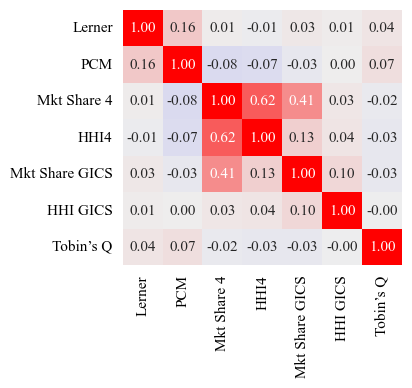

,Sum of Correlations
lerner,1.237638
price_cost_margin,1.041611
mktshare4,1.971172
hhi4,1.684995
mktshare_gsubind,1.614831
hhi_gsubind,1.178724
tobins_q,1.036161


In [13]:
def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb =matplotlib.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

hc = ['#0000FF', '#EEEEEE', '#FF0000']
th = [0, 0.5, 1]


matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 11
matplotlib.rcParams['xtick.bottom'] = False


cdict = NonLinCdict(th, hc)
cm = matplotlib.colors.LinearSegmentedColormap('test', cdict)

data_correlation = tdfs[['lerner', 'price_cost_margin', 'mktshare4', 'hhi4', 'mktshare_gsubind', 'hhi_gsubind', 'tobins_q']].corr() 

fig, ax = plt.subplots(figsize=(6.5, 3.5))
plt.subplots_adjust(left=0.335, right=0.765, top=0.98, bottom=0.25)

ax = sns.heatmap(data_correlation, vmin=-1, vmax=1, cmap=cm, annot=True, fmt='.2f', cbar=False)
ax.set_xticklabels(['Lerner','PCM','Mkt Share 4', 'HHI4', 'Mkt Share GICS', 'HHI GICS', 'Tobin’s Q'])
ax.set_yticklabels(['Lerner','PCM','Mkt Share 4', 'HHI4', 'Mkt Share GICS', 'HHI GICS', 'Tobin’s Q'])
plt.savefig(folder + '/correlation_among_measures.svg', transparent=True)
plt.show()
display(pd.DataFrame(data_correlation.sum(), columns=['Sum of Correlations']))


matplotlib.rcParams['font.family'] = 'NewComputerModern10Book'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['xtick.bottom'] = True

## Regressions

In [15]:
regfolder = 'Robustness Analysis' if folder == 'Robustness Histograms' else 'Unfiltered Analysis'
print(regfolder)

Robustness Analysis


In [16]:
simple_mod = smf.rlm('beta_ul ~ lerner', data=tdfs[(tdfs['lerner_na'] == 0) & (tdfs.datadate >= np.datetime64('2012-01-01'))]).fit()

with open(regfolder + "/simple_mod.txt", "w") as text_file:
    text_file.write(str(simple_mod.summary()))

display(simple_mod.summary())
del(simple_mod)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                60993
Model:                            RLM   Df Residuals:                    60991
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:21:24                                         
No. Iterations:                    20                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9626      0.002    436.497      0.000       0.958       0.967
lerner        -0.1421      0.008    -18.902      0.000      -0.157      -0.127
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [17]:
simple_mod1 = smf.rlm('beta_ul ~ lerner + Market_Cap', data=tdfs[tdfs['lerner_na'] == 0]).fit()

with open(regfolder + "/simple_mod1.txt", "w") as text_file:
    text_file.write(str(simple_mod1.summary()))

display(simple_mod1.summary())
del(simple_mod1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                60993
Model:                            RLM   Df Residuals:                    60990
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:21:26                                         
No. Iterations:                    17                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9667      0.002    428.602      0.000       0.962       0.971
lerner        -0.1394      0.008    -18.530      0.000      -0.154      -0.125
Market_Cap -2.555e-07   3.27e-08     -7.824      0.000    -3.2e-07   -1.92e-07
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [18]:
#hreg_abdoh_varela_mod = smf.rlm('beta_ul ~ hhi4 + Market_Cap + np.log(prccq) + np.log(atq) + I((atq - dlttq) / Market_Cap)',
#                                data=tdfs)

hreg_abdoh_varela_mod = smf.rlm('beta_ul ~ hhi4 + Market_Cap', data=tdfs).fit()

with open(regfolder + "/hreg_abdoh_varela_mod.txt", "w") as text_file:
    text_file.write(str(hreg_abdoh_varela_mod.summary()))

display(hreg_abdoh_varela_mod.summary())
del(hreg_abdoh_varela_mod)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                60993
Model:                            RLM   Df Residuals:                    60990
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:21:26                                         
No. Iterations:                    20                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9732      0.003    299.543      0.000       0.967       0.980
hhi4          -0.0637      0.011     -5.613      0.000      -0.086      -0.041
Market_Cap -2.853e-07   3.27e-08     -8.726      0.000   -3.49e-07   -2.21e-07
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [19]:
simple_mod2 = smf.rlm('beta_ul ~ lerner + Market_Cap + np.log(prccq)', data=tdfs[tdfs['lerner_na'] == 0]).fit()

with open(regfolder + "/simple_mod2.txt", "w") as text_file:
    text_file.write(str(simple_mod2.summary()))

display(simple_mod2.summary())
del(simple_mod2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                60993
Model:                            RLM   Df Residuals:                    60989
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:21:27                                         
No. Iterations:                    32                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9251      0.006    161.075      0.000       0.914       0.936
lerner           -0.1423      0.008    -18.931      0.000      -0.157      -0.128
Market_Cap    -3.189e-07   3.34e-08     -9.538      0.000   -3.84e-07   -2.53e-07
np.log(prccq)     0.0128      0.002      7.645      0.000       0.010       0.016
=================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [20]:
simple_mod3 = smf.rlm('beta_ul ~ lerner + Market_Cap + np.log(prccq) + C(cyear)', 
                      data=tdfs[tdfs['lerner_na'] == 0]).fit()

with open(regfolder + "/simple_mod3_lerner.txt", "w") as text_file:
    text_file.write(str(simple_mod3.summary()))

display(simple_mod3.summary())
del(simple_mod3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                60993
Model:                            RLM   Df Residuals:                    60979
Method:                          IRLS   Df Model:                           13
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:21:29                                         
No. Iterations:                    19                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0352      0.009    119.434      0.000       1.018       1.052
C(cyear)[T.2013]     0.0101      0.010      1.005      0.315      -0.010       0.030
C(cyear)[T.2014]     0.0007      0.010      0.071      0.944      -0.019       0.020
C(cyear)[T.2015]    -0.0556      0.010     -5.565      0.000      -0.075      -0.036
C(cyear)[T.2016]    -0.1264      0.010    -12.581      0.000      -0.146      -0.107
C(cyear)[T.2017]    -0.1891      0.010    -18.810      0.000      -0.209      -0.169
C(cyear)[T.2018]    -0.2720      0.010    -26.989      0.000      -0.292      -0.252
C(cyear)[T.2019]    -0.2518      0.010    -24.753      0.000      -0.272      -0.232
C(cyear)[T.2020]    -0.1897      0.010    -18.515      0.000      -0.210      -0.170
C(cyear)[T.2021]    -0.0787      0.010     -7.669      0.000      -0.099      -0.059
C(cyear)[T.2022]    -0.1812      0.010    -17.673      0.000      -0.201      -0.161
lerner              -0.1633      0.007    -21.933      0.000      -0.178      -0.149
Market_Cap       -2.779e-07   3.31e-08     -8.391      0.000   -3.43e-07   -2.13e-07
np.log(prccq)        0.0166      0.002      9.985      0.000       0.013       0.020
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [21]:
simple_mod3 = smf.rlm('beta_ul ~ price_cost_margin + Market_Cap + np.log(prccq) + C(cyear)', 
                      data=tdfs[tdfs['price_cost_margin_na'] == 0]).fit()

with open(regfolder + "/simple_mod3_pcm.txt", "w") as text_file:
    text_file.write(str(simple_mod3.summary()))

display(simple_mod3.summary())
del(simple_mod3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                60993
Model:                            RLM   Df Residuals:                    60979
Method:                          IRLS   Df Model:                           13
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:21:30                                         
No. Iterations:                    19                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.0166      0.009    113.683      0.000       0.999       1.034
C(cyear)[T.2013]      0.0142      0.010      1.406      0.160      -0.006       0.034
C(cyear)[T.2014]      0.0046      0.010      0.460      0.646      -0.015       0.024
C(cyear)[T.2015]     -0.0497      0.010     -4.960      0.000      -0.069      -0.030
C(cyear)[T.2016]     -0.1179      0.010    -11.699      0.000      -0.138      -0.098
C(cyear)[T.2017]     -0.1784      0.010    -17.700      0.000      -0.198      -0.159
C(cyear)[T.2018]     -0.2616      0.010    -25.887      0.000      -0.281      -0.242
C(cyear)[T.2019]     -0.2426      0.010    -23.776      0.000      -0.263      -0.223
C(cyear)[T.2020]     -0.1793      0.010    -17.453      0.000      -0.199      -0.159
C(cyear)[T.2021]     -0.0693      0.010     -6.736      0.000      -0.089      -0.049
C(cyear)[T.2022]     -0.1715      0.010    -16.682      0.000      -0.192      -0.151
price_cost_margin     0.0525      0.010      5.095      0.000       0.032       0.073
Market_Cap        -3.111e-07   3.33e-08     -9.354      0.000   -3.76e-07   -2.46e-07
np.log(prccq)         0.0145      0.002      8.718      0.000       0.011       0.018
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [22]:
simple_mod4 = smf.rlm('beta_ul ~ lerner + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['lerner_na'] == 0]).fit()

with open(regfolder + "/simple_mod4_lerner.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                58636
Model:                            RLM   Df Residuals:                    58599
Method:                          IRLS   Df Model:                           36
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:21:36                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6635      0.031     21.142      0.000       0.602       0.725
naics2[T.21]         0.3538      0.032     11.106      0.000       0.291       0.416
naics2[T.22]        -0.2898      0.032     -9.050      0.000      -0.353      -0.227
naics2[T.23]         0.4821      0.036     13.479      0.000       0.412       0.552
naics2[T.31]         0.1028      0.032      3.250      0.001       0.041       0.165
naics2[T.32]         0.3467      0.031     11.231      0.000       0.286       0.407
naics2[T.33]         0.5041      0.031     16.504      0.000       0.444       0.564
naics2[T.42]         0.2646      0.032      8.320      0.000       0.202       0.327
naics2[T.44]         0.2829      0.033      8.615      0.000       0.219       0.347
naics2[T.45]         0.2417      0.032      7.492      0.000       0.178       0.305
naics2[T.48]         0.1925      0.032      6.048      0.000       0.130       0.255
naics2[T.49]         0.2734      0.055      4.939      0.000       0.165       0.382
naics2[T.51]         0.2628      0.031      8.493      0.000       0.202       0.323
naics2[T.52]         0.3099      0.033      9.271      0.000       0.244       0.375
naics2[T.53]         0.1822      0.034      5.433      0.000       0.116       0.248
naics2[T.54]         0.3321      0.032     10.450      0.000       0.270       0.394
naics2[T.56]         0.2884      0.033      8.860      0.000       0.225       0.352
naics2[T.61]         0.3860      0.039      9.864      0.000       0.309       0.463
naics2[T.62]         0.1223      0.033      3.694      0.000       0.057       0.187
naics2[T.71]         0.1278      0.037      3.487      0.000       0.056       0.200
naics2[T.72]         0.1940      0.033      5.819      0.000       0.129       0.259
naics2[T.81]         0.1145      0.042      2.707      0.007       0.032       0.197
naics2[T.99]         0.1205      0.059      2.039      0.041       0.005       0.236
C(cyear)[T.2013]     0.0030      0.009      0.322      0.748      -0.015       0.021
C(cyear)[T.2014]    -0.0045      0.009     -0.483      0.629      -0.023       0.014
C(cyear)[T.2015]    -0.0588      0.009     -6.356      0.000      -0.077      -0.041
C(cyear)[T.2016]    -0.1337      0.009    -14.372      0.000      -0.152      -0.115
C(cyear)[T.2017]    -0.2026      0.009    -21.741      0.000      -0.221      -0.184
C(cyear)[T.2018]    -0.2775      0.009    -29.699      0.000      -0.296      -0.259
C(cyear)[T.2019]    -0.2508      0.009    -26.652      0.000      -0.269      -0.232
C(cyear)[T.2020]    -0.1885      0.009    -19.909      0.000      -0.207      -0.170
C(cyear)[T.2021]    -0.0870      0.009     -9.178      0.000      -0.106      -0.068
C(cyear)[T.2022]    -0.1810      0.009    -19.101      0.000      -0.200      -0.162
lerner              -0.

In [23]:
simple_mod4 = smf.rlm('beta_ul ~ price_cost_margin + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[tdfs['price_cost_margin_na'] == 0]).fit()

with open(regfolder + "/simple_mod4_pcm.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                58636
Model:                            RLM   Df Residuals:                    58599
Method:                          IRLS   Df Model:                           36
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:21:42                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6302      0.032     19.935      0.000       0.568       0.692
naics2[T.21]          0.3667      0.032     11.484      0.000       0.304       0.429
naics2[T.22]         -0.2818      0.032     -8.775      0.000      -0.345      -0.219
naics2[T.23]          0.5134      0.036     14.292      0.000       0.443       0.584
naics2[T.31]          0.1190      0.032      3.749      0.000       0.057       0.181
naics2[T.32]          0.3624      0.031     11.703      0.000       0.302       0.423
naics2[T.33]          0.5234      0.031     17.072      0.000       0.463       0.583
naics2[T.42]          0.2924      0.032      9.149      0.000       0.230       0.355
naics2[T.44]          0.3045      0.033      9.227      0.000       0.240       0.369
naics2[T.45]          0.2558      0.032      7.902      0.000       0.192       0.319
naics2[T.48]          0.2049      0.032      6.420      0.000       0.142       0.267
naics2[T.49]          0.3075      0.056      5.534      0.000       0.199       0.416
naics2[T.51]          0.2753      0.031      8.868      0.000       0.214       0.336
naics2[T.52]          0.3238      0.034      9.657      0.000       0.258       0.389
naics2[T.53]          0.1856      0.034      5.522      0.000       0.120       0.252
naics2[T.54]          0.3461      0.032     10.854      0.000       0.284       0.409
naics2[T.56]          0.3045      0.033      9.318      0.000       0.240       0.369
naics2[T.61]          0.3883      0.039      9.897      0.000       0.311       0.465
naics2[T.62]          0.1499      0.033      4.510      0.000       0.085       0.215
naics2[T.71]          0.1262      0.037      3.433      0.001       0.054       0.198
naics2[T.72]          0.2057      0.033      6.150      0.000       0.140       0.271
naics2[T.81]          0.1236      0.042      2.913      0.004       0.040       0.207
naics2[T.99]          0.1419      0.059      2.395      0.017       0.026       0.258
C(cyear)[T.2013]      0.0066      0.009      0.707      0.480      -0.012       0.025
C(cyear)[T.2014]     -0.0014      0.009     -0.148      0.882      -0.020       0.017
C(cyear)[T.2015]     -0.0542      0.009     -5.849      0.000      -0.072      -0.036
C(cyear)[T.2016]     -0.1268      0.009    -13.603      0.000      -0.145      -0.109
C(cyear)[T.2017]     -0.1943      0.009    -20.825      0.000      -0.213      -0.176
C(cyear)[T.2018]     -0.2695      0.009    -28.796      0.000      -0.288      -0.251
C(cyear)[T.2019]     -0.2433      0.009    -25.798      0.000      -0.262      -0.225
C(cyear)[T.2020]     -0.1804      0.009    -19.020      0.000      -0.199      -0.162
C(cyear)[T.2021]     -0.0801      0.009     -8.438      0.000      -0.099      -0.062
C(cyear)[T.2022]     -0.1739      0.009    -18.321      0.000      -0.193

In [24]:
simple_mod4 = smf.rlm('beta_ul ~ hhi4 + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs).fit()

with open(regfolder + "/simple_mod4_hhi.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                58636
Model:                            RLM   Df Residuals:                    58599
Method:                          IRLS   Df Model:                           36
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:21:48                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5879      0.033     17.809      0.000       0.523       0.653
naics2[T.21]         0.4223      0.033     12.770      0.000       0.358       0.487
naics2[T.22]        -0.2325      0.033     -6.979      0.000      -0.298      -0.167
naics2[T.23]         0.5246      0.036     14.513      0.000       0.454       0.595
naics2[T.31]         0.1448      0.032      4.489      0.000       0.082       0.208
naics2[T.32]         0.4024      0.032     12.597      0.000       0.340       0.465
naics2[T.33]         0.5621      0.032     17.772      0.000       0.500       0.624
naics2[T.42]         0.3141      0.032      9.669      0.000       0.250       0.378
naics2[T.44]         0.3273      0.033      9.774      0.000       0.262       0.393
naics2[T.45]         0.2766      0.033      8.456      0.000       0.212       0.341
naics2[T.48]         0.2466      0.033      7.519      0.000       0.182       0.311
naics2[T.49]         0.3158      0.056      5.669      0.000       0.207       0.425
naics2[T.51]         0.3146      0.032      9.855      0.000       0.252       0.377
naics2[T.52]         0.3669      0.035     10.624      0.000       0.299       0.435
naics2[T.53]         0.2341      0.035      6.767      0.000       0.166       0.302
naics2[T.54]         0.3830      0.033     11.710      0.000       0.319       0.447
naics2[T.56]         0.3346      0.033     10.040      0.000       0.269       0.400
naics2[T.61]         0.4228      0.040     10.667      0.000       0.345       0.500
naics2[T.62]         0.1657      0.034      4.938      0.000       0.100       0.232
naics2[T.71]         0.1611      0.037      4.318      0.000       0.088       0.234
naics2[T.72]         0.2513      0.034      7.292      0.000       0.184       0.319
naics2[T.81]         0.1214      0.042      2.859      0.004       0.038       0.205
naics2[T.99]         0.1747      0.060      2.930      0.003       0.058       0.292
C(cyear)[T.2013]     0.0059      0.009      0.637      0.524      -0.012       0.024
C(cyear)[T.2014]    -0.0024      0.009     -0.264      0.792      -0.021       0.016
C(cyear)[T.2015]    -0.0552      0.009     -5.950      0.000      -0.073      -0.037
C(cyear)[T.2016]    -0.1282      0.009    -13.757      0.000      -0.147      -0.110
C(cyear)[T.2017]    -0.1960      0.009    -20.998      0.000      -0.214      -0.178
C(cyear)[T.2018]    -0.2709      0.009    -28.932      0.000      -0.289      -0.253
C(cyear)[T.2019]    -0.2450      0.009    -25.977      0.000      -0.263      -0.227
C(cyear)[T.2020]    -0.1814      0.009    -19.122      0.000      -0.200      -0.163
C(cyear)[T.2021]    -0.0804      0.009     -8.462      0.000      -0.099      -0.062
C(cyear)[T.2022]    -0.1745      0.009    -18.377      0.000      -0.193      -0.156
hhi4                 0.

In [25]:
simple_mod4 = smf.rlm('beta_ul ~ I(mroic - qRR) + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs).fit()

with open(regfolder + "/simple_mod4_mroic.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                58421
Model:                            RLM   Df Residuals:                    58384
Method:                          IRLS   Df Model:                           36
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:21:53                                         
No. Iterations:                    47                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6508      0.032     20.653      0.000       0.589       0.713
naics2[T.21]         0.3674      0.032     11.486      0.000       0.305       0.430
naics2[T.22]        -0.2895      0.032     -9.004      0.000      -0.353      -0.226
naics2[T.23]         0.4847      0.036     13.468      0.000       0.414       0.555
naics2[T.31]         0.1178      0.032      3.704      0.000       0.055       0.180
naics2[T.32]         0.3524      0.031     11.370      0.000       0.292       0.413
naics2[T.33]         0.5118      0.031     16.687      0.000       0.452       0.572
naics2[T.42]         0.2729      0.032      8.546      0.000       0.210       0.335
naics2[T.44]         0.2879      0.033      8.729      0.000       0.223       0.353
naics2[T.45]         0.2422      0.032      7.468      0.000       0.179       0.306
naics2[T.48]         0.1979      0.032      6.194      0.000       0.135       0.261
naics2[T.49]         0.2842      0.056      5.112      0.000       0.175       0.393
naics2[T.51]         0.2666      0.031      8.579      0.000       0.206       0.327
naics2[T.52]         0.3143      0.034      9.363      0.000       0.248       0.380
naics2[T.53]         0.1822      0.034      5.411      0.000       0.116       0.248
naics2[T.54]         0.3366      0.032     10.548      0.000       0.274       0.399
naics2[T.56]         0.2919      0.033      8.931      0.000       0.228       0.356
naics2[T.61]         0.3860      0.039      9.822      0.000       0.309       0.463
naics2[T.62]         0.1380      0.033      4.140      0.000       0.073       0.203
naics2[T.71]         0.1206      0.037      3.277      0.001       0.048       0.193
naics2[T.72]         0.1976      0.033      5.903      0.000       0.132       0.263
naics2[T.81]         0.1068      0.042      2.515      0.012       0.024       0.190
naics2[T.99]         0.1297      0.059      2.186      0.029       0.013       0.246
C(cyear)[T.2013]     0.0063      0.009      0.670      0.503      -0.012       0.025
C(cyear)[T.2014]    -0.0013      0.009     -0.143      0.886      -0.020       0.017
C(cyear)[T.2015]    -0.0539      0.009     -5.791      0.000      -0.072      -0.036
C(cyear)[T.2016]    -0.1264      0.009    -13.510      0.000      -0.145      -0.108
C(cyear)[T.2017]    -0.1940      0.009    -20.711      0.000      -0.212      -0.176
C(cyear)[T.2018]    -0.2696      0.009    -28.702      0.000      -0.288      -0.251
C(cyear)[T.2019]    -0.2427      0.009    -25.648      0.000      -0.261      -0.224
C(cyear)[T.2020]    -0.1793      0.010    -18.838      0.000      -0.198      -0.161
C(cyear)[T.2021]    -0.0784      0.010     -8.231      0.000      -0.097      -0.060
C(cyear)[T.2022]    -0.1720      0.010    -18.058      0.000      -0.191      -0.153
I(mroic - qRR)      -0.

In [26]:
simple_mod4 = smf.rlm('beta_ul ~ ar_coef + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs[(tdfs.ar_coef < 1) & (tdfs.ar_coef > 0)]).fit()

with open(regfolder + "/simple_mod4_ar.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                31636
Model:                            RLM   Df Residuals:                    31599
Method:                          IRLS   Df Model:                           36
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:21:55                                         
No. Iterations:                    28                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6878      0.037     18.725      0.000       0.616       0.760
naics2[T.21]         0.3640      0.037      9.803      0.000       0.291       0.437
naics2[T.22]        -0.2183      0.039     -5.544      0.000      -0.296      -0.141
naics2[T.23]         0.5071      0.042     12.121      0.000       0.425       0.589
naics2[T.31]         0.1454      0.038      3.865      0.000       0.072       0.219
naics2[T.32]         0.3740      0.036     10.422      0.000       0.304       0.444
naics2[T.33]         0.5331      0.035     15.107      0.000       0.464       0.602
naics2[T.42]         0.2963      0.037      7.945      0.000       0.223       0.369
naics2[T.44]         0.2445      0.040      6.179      0.000       0.167       0.322
naics2[T.45]         0.3000      0.039      7.614      0.000       0.223       0.377
naics2[T.48]         0.1961      0.037      5.243      0.000       0.123       0.269
naics2[T.49]         0.4123      0.079      5.232      0.000       0.258       0.567
naics2[T.51]         0.2437      0.036      6.779      0.000       0.173       0.314
naics2[T.52]         0.4171      0.040     10.438      0.000       0.339       0.495
naics2[T.53]         0.1977      0.041      4.772      0.000       0.117       0.279
naics2[T.54]         0.3556      0.038      9.430      0.000       0.282       0.430
naics2[T.56]         0.2501      0.038      6.498      0.000       0.175       0.325
naics2[T.61]         0.4399      0.051      8.647      0.000       0.340       0.540
naics2[T.62]         0.1083      0.040      2.718      0.007       0.030       0.186
naics2[T.71]         0.1783      0.048      3.717      0.000       0.084       0.272
naics2[T.72]         0.2493      0.040      6.274      0.000       0.171       0.327
naics2[T.81]         0.1432      0.053      2.694      0.007       0.039       0.247
naics2[T.99]         0.1779      0.081      2.203      0.028       0.020       0.336
C(cyear)[T.2013]    -0.0063      0.013     -0.490      0.624      -0.031       0.019
C(cyear)[T.2014]    -0.0169      0.013     -1.321      0.186      -0.042       0.008
C(cyear)[T.2015]    -0.0727      0.013     -5.575      0.000      -0.098      -0.047
C(cyear)[T.2016]    -0.1566      0.013    -11.942      0.000      -0.182      -0.131
C(cyear)[T.2017]    -0.2278      0.013    -17.496      0.000      -0.253      -0.202
C(cyear)[T.2018]    -0.3196      0.013    -24.535      0.000      -0.345      -0.294
C(cyear)[T.2019]    -0.2917      0.013    -22.294      0.000      -0.317      -0.266
C(cyear)[T.2020]    -0.2157      0.013    -16.353      0.000      -0.242      -0.190
C(cyear)[T.2021]    -0.1166      0.013     -8.988      0.000      -0.142      -0.091
C(cyear)[T.2022]    -0.2057      0.013    -15.891      0.000      -0.231      -0.180
ar_coef              0.

In [27]:
simple_mod4 = smf.rlm('beta_ul ~ tobins_q + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs).fit()

with open(regfolder + "/simple_mod4_tobinsq.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                58636
Model:                            RLM   Df Residuals:                    58599
Method:                          IRLS   Df Model:                           36
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:22:00                                         
No. Iterations:                    35                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6515      0.031     20.698      0.000       0.590       0.713
naics2[T.21]         0.3676      0.032     11.504      0.000       0.305       0.430
naics2[T.22]        -0.2895      0.032     -9.014      0.000      -0.352      -0.227
naics2[T.23]         0.4962      0.036     13.833      0.000       0.426       0.567
naics2[T.31]         0.1078      0.032      3.397      0.001       0.046       0.170
naics2[T.32]         0.3534      0.031     11.411      0.000       0.293       0.414
naics2[T.33]         0.5122      0.031     16.715      0.000       0.452       0.572
naics2[T.42]         0.2741      0.032      8.594      0.000       0.212       0.337
naics2[T.44]         0.2884      0.033      8.753      0.000       0.224       0.353
naics2[T.45]         0.2440      0.032      7.540      0.000       0.181       0.307
naics2[T.48]         0.1983      0.032      6.212      0.000       0.136       0.261
naics2[T.49]         0.2858      0.056      5.146      0.000       0.177       0.395
naics2[T.51]         0.2679      0.031      8.629      0.000       0.207       0.329
naics2[T.52]         0.3149      0.034      9.390      0.000       0.249       0.381
naics2[T.53]         0.1827      0.034      5.431      0.000       0.117       0.249
naics2[T.54]         0.3380      0.032     10.598      0.000       0.275       0.400
naics2[T.56]         0.2929      0.033      8.968      0.000       0.229       0.357
naics2[T.61]         0.3862      0.039      9.839      0.000       0.309       0.463
naics2[T.62]         0.1354      0.033      4.077      0.000       0.070       0.201
naics2[T.71]         0.1211      0.037      3.294      0.001       0.049       0.193
naics2[T.72]         0.1993      0.033      5.957      0.000       0.134       0.265
naics2[T.81]         0.1072      0.042      2.528      0.011       0.024       0.190
naics2[T.99]         0.1292      0.059      2.180      0.029       0.013       0.245
C(cyear)[T.2013]     0.0062      0.009      0.665      0.506      -0.012       0.024
C(cyear)[T.2014]    -0.0018      0.009     -0.193      0.847      -0.020       0.016
C(cyear)[T.2015]    -0.0544      0.009     -5.868      0.000      -0.073      -0.036
C(cyear)[T.2016]    -0.1272      0.009    -13.639      0.000      -0.145      -0.109
C(cyear)[T.2017]    -0.1941      0.009    -20.789      0.000      -0.212      -0.176
C(cyear)[T.2018]    -0.2691      0.009    -28.730      0.000      -0.287      -0.251
C(cyear)[T.2019]    -0.2433      0.009    -25.782      0.000      -0.262      -0.225
C(cyear)[T.2020]    -0.1800      0.009    -18.962      0.000      -0.199      -0.161
C(cyear)[T.2021]    -0.0781      0.010     -8.217      0.000      -0.097      -0.059
C(cyear)[T.2022]    -0.1725      0.009    -18.158      0.000      -0.191      -0.154
tobins_q            -0.

In [28]:
simple_mod4 = smf.rlm('beta_ul ~  mktshare4 + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs).fit()

with open(regfolder + "/simple_mod4_mktshare.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                58636
Model:                            RLM   Df Residuals:                    58599
Method:                          IRLS   Df Model:                           36
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:22:05                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6214      0.032     19.383      0.000       0.559       0.684
naics2[T.21]         0.3981      0.033     12.220      0.000       0.334       0.462
naics2[T.22]        -0.2552      0.033     -7.765      0.000      -0.320      -0.191
naics2[T.23]         0.5111      0.036     14.194      0.000       0.440       0.582
naics2[T.31]         0.1332      0.032      4.138      0.000       0.070       0.196
naics2[T.32]         0.3818      0.032     12.095      0.000       0.320       0.444
naics2[T.33]         0.5419      0.031     17.318      0.000       0.481       0.603
naics2[T.42]         0.2981      0.032      9.231      0.000       0.235       0.361
naics2[T.44]         0.3091      0.033      9.307      0.000       0.244       0.374
naics2[T.45]         0.2654      0.033      8.130      0.000       0.201       0.329
naics2[T.48]         0.2247      0.032      6.942      0.000       0.161       0.288
naics2[T.49]         0.2987      0.056      5.370      0.000       0.190       0.408
naics2[T.51]         0.2977      0.032      9.395      0.000       0.236       0.360
naics2[T.52]         0.3459      0.034     10.122      0.000       0.279       0.413
naics2[T.53]         0.2107      0.034      6.169      0.000       0.144       0.278
naics2[T.54]         0.3661      0.032     11.272      0.000       0.302       0.430
naics2[T.56]         0.3167      0.033      9.584      0.000       0.252       0.381
naics2[T.61]         0.4029      0.039     10.233      0.000       0.326       0.480
naics2[T.62]         0.1523      0.033      4.557      0.000       0.087       0.218
naics2[T.71]         0.1409      0.037      3.808      0.000       0.068       0.213
naics2[T.72]         0.2283      0.034      6.710      0.000       0.162       0.295
naics2[T.81]         0.1142      0.042      2.692      0.007       0.031       0.197
naics2[T.99]         0.1610      0.060      2.702      0.007       0.044       0.278
C(cyear)[T.2013]     0.0061      0.009      0.659      0.510      -0.012       0.024
C(cyear)[T.2014]    -0.0019      0.009     -0.210      0.834      -0.020       0.016
C(cyear)[T.2015]    -0.0547      0.009     -5.899      0.000      -0.073      -0.037
C(cyear)[T.2016]    -0.1274      0.009    -13.666      0.000      -0.146      -0.109
C(cyear)[T.2017]    -0.1942      0.009    -20.801      0.000      -0.212      -0.176
C(cyear)[T.2018]    -0.2691      0.009    -28.743      0.000      -0.287      -0.251
C(cyear)[T.2019]    -0.2432      0.009    -25.790      0.000      -0.262      -0.225
C(cyear)[T.2020]    -0.1800      0.009    -18.973      0.000      -0.199      -0.161
C(cyear)[T.2021]    -0.0779      0.010     -8.204      0.000      -0.097      -0.059
C(cyear)[T.2022]    -0.1723      0.009    -18.152      0.000      -0.191      -0.154
mktshare4            0.

In [29]:
simple_mod4 = smf.rlm('beta_ul ~  mktshare_gsubind + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs).fit()

with open(regfolder + "/simple_mod4_mktshare_gsubind.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                58636
Model:                            RLM   Df Residuals:                    58599
Method:                          IRLS   Df Model:                           36
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:22:11                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6595      0.031     20.940      0.000       0.598       0.721
naics2[T.21]         0.3631      0.032     11.364      0.000       0.301       0.426
naics2[T.22]        -0.2974      0.032     -9.250      0.000      -0.360      -0.234
naics2[T.23]         0.4906      0.036     13.672      0.000       0.420       0.561
naics2[T.31]         0.1041      0.032      3.280      0.001       0.042       0.166
naics2[T.32]         0.3486      0.031     11.255      0.000       0.288       0.409
naics2[T.33]         0.5065      0.031     16.520      0.000       0.446       0.567
naics2[T.42]         0.2714      0.032      8.507      0.000       0.209       0.334
naics2[T.44]         0.2887      0.033      8.765      0.000       0.224       0.353
naics2[T.45]         0.2418      0.032      7.473      0.000       0.178       0.305
naics2[T.48]         0.1930      0.032      6.043      0.000       0.130       0.256
naics2[T.49]         0.2940      0.056      5.292      0.000       0.185       0.403
naics2[T.51]         0.2610      0.031      8.403      0.000       0.200       0.322
naics2[T.52]         0.3119      0.034      9.300      0.000       0.246       0.378
naics2[T.53]         0.1893      0.034      5.625      0.000       0.123       0.255
naics2[T.54]         0.3296      0.032     10.330      0.000       0.267       0.392
naics2[T.56]         0.2879      0.033      8.815      0.000       0.224       0.352
naics2[T.61]         0.3796      0.039      9.668      0.000       0.303       0.457
naics2[T.62]         0.1289      0.033      3.880      0.000       0.064       0.194
naics2[T.71]         0.1152      0.037      3.135      0.002       0.043       0.187
naics2[T.72]         0.1895      0.033      5.662      0.000       0.124       0.255
naics2[T.81]         0.1049      0.042      2.473      0.013       0.022       0.188
naics2[T.99]         0.1263      0.059      2.132      0.033       0.010       0.242
C(cyear)[T.2013]     0.0058      0.009      0.627      0.531      -0.012       0.024
C(cyear)[T.2014]    -0.0022      0.009     -0.238      0.812      -0.020       0.016
C(cyear)[T.2015]    -0.0548      0.009     -5.905      0.000      -0.073      -0.037
C(cyear)[T.2016]    -0.1273      0.009    -13.652      0.000      -0.146      -0.109
C(cyear)[T.2017]    -0.1946      0.009    -20.850      0.000      -0.213      -0.176
C(cyear)[T.2018]    -0.2695      0.009    -28.788      0.000      -0.288      -0.251
C(cyear)[T.2019]    -0.2436      0.009    -25.830      0.000      -0.262      -0.225
C(cyear)[T.2020]    -0.1803      0.009    -19.006      0.000      -0.199      -0.162
C(cyear)[T.2021]    -0.0801      0.010     -8.428      0.000      -0.099      -0.061
C(cyear)[T.2022]    -0.1733      0.009    -18.251      0.000      -0.192      -0.155
mktshare_gsubind    -0.

In [30]:
simple_mod4 = smf.rlm('beta_ul ~ hhi_gsubind + Market_Cap + np.log(prccq) + naics2 + Current_Ratio + C(cyear)', 
                      data=tdfs).fit()

with open(regfolder + "/simple_mod4_hhi_gsubind.txt", "w") as text_file:
    text_file.write(str(simple_mod4.summary()))

display(simple_mod4.summary())
del(simple_mod4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                58636
Model:                            RLM   Df Residuals:                    58599
Method:                          IRLS   Df Model:                           36
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:22:17                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6725      0.032     20.974      0.000       0.610       0.735
naics2[T.21]         0.3554      0.032     11.060      0.000       0.292       0.418
naics2[T.22]        -0.3034      0.032     -9.368      0.000      -0.367      -0.240
naics2[T.23]         0.4814      0.036     13.320      0.000       0.411       0.552
naics2[T.31]         0.1009      0.032      3.173      0.002       0.039       0.163
naics2[T.32]         0.3428      0.031     11.022      0.000       0.282       0.404
naics2[T.33]         0.4995      0.031     16.189      0.000       0.439       0.560
naics2[T.42]         0.2643      0.032      8.252      0.000       0.202       0.327
naics2[T.44]         0.2804      0.033      8.490      0.000       0.216       0.345
naics2[T.45]         0.2351      0.032      7.245      0.000       0.172       0.299
naics2[T.48]         0.1859      0.032      5.786      0.000       0.123       0.249
naics2[T.49]         0.2786      0.056      5.014      0.000       0.170       0.387
naics2[T.51]         0.2562      0.031      8.213      0.000       0.195       0.317
naics2[T.52]         0.3055      0.034      9.080      0.000       0.240       0.371
naics2[T.53]         0.1795      0.034      5.335      0.000       0.114       0.245
naics2[T.54]         0.3248      0.032     10.130      0.000       0.262       0.388
naics2[T.56]         0.2814      0.033      8.577      0.000       0.217       0.346
naics2[T.61]         0.3720      0.039      9.424      0.000       0.295       0.449
naics2[T.62]         0.1299      0.033      3.907      0.000       0.065       0.195
naics2[T.71]         0.1082      0.037      2.929      0.003       0.036       0.181
naics2[T.72]         0.1831      0.034      5.430      0.000       0.117       0.249
naics2[T.81]         0.0956      0.043      2.249      0.025       0.012       0.179
naics2[T.99]         0.1202      0.059      2.026      0.043       0.004       0.236
C(cyear)[T.2013]     0.0061      0.009      0.654      0.513      -0.012       0.024
C(cyear)[T.2014]    -0.0021      0.009     -0.227      0.820      -0.020       0.016
C(cyear)[T.2015]    -0.0548      0.009     -5.907      0.000      -0.073      -0.037
C(cyear)[T.2016]    -0.1274      0.009    -13.656      0.000      -0.146      -0.109
C(cyear)[T.2017]    -0.1941      0.009    -20.790      0.000      -0.212      -0.176
C(cyear)[T.2018]    -0.2692      0.009    -28.751      0.000      -0.288      -0.251
C(cyear)[T.2019]    -0.2431      0.009    -25.768      0.000      -0.262      -0.225
C(cyear)[T.2020]    -0.1797      0.009    -18.933      0.000      -0.198      -0.161
C(cyear)[T.2021]    -0.0786      0.010     -8.270      0.000      -0.097      -0.060
C(cyear)[T.2022]    -0.1723      0.009    -18.149      0.000      -0.191      -0.154
hhi_gsubind         -0.

In [31]:
simple_mod_i1 = smf.rlm('beta_ul ~ price_cost_margin * Revenue + Market_Cap + Current_Ratio + naics2 + C(cyear)', 
                        data=tdfs[tdfs['price_cost_margin_na'] == 0]).fit()

with open(regfolder + "/simple_mod_i1_pcm.txt", "w") as text_file:
    text_file.write(str(simple_mod_i1.summary()))
    
display(simple_mod_i1.summary())
del(simple_mod_i1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                58636
Model:                            RLM   Df Residuals:                    58598
Method:                          IRLS   Df Model:                           37
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:22:23                                         
No. Iterations:                    50                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.7144      0.031     22.773      0.000       0.653       0.776
naics2[T.21]                  0.3535      0.032     11.033      0.000       0.291       0.416
naics2[T.22]                 -0.2751      0.032     -8.532      0.000      -0.338      -0.212
naics2[T.23]                  0.5044      0.036     13.991      0.000       0.434       0.575
naics2[T.31]                  0.1230      0.032      3.861      0.000       0.061       0.185
naics2[T.32]                  0.3709      0.031     11.932      0.000       0.310       0.432
naics2[T.33]                  0.5251      0.031     17.063      0.000       0.465       0.585
naics2[T.42]                  0.3055      0.032      9.518      0.000       0.243       0.368
naics2[T.44]                  0.3228      0.033      9.741      0.000       0.258       0.388
naics2[T.45]                  0.2696      0.033      8.288      0.000       0.206       0.333
naics2[T.48]                  0.2048      0.032      6.390      0.000       0.142       0.268
naics2[T.49]                  0.3597      0.056      6.437      0.000       0.250       0.469
naics2[T.51]                  0.2652      0.031      8.513      0.000       0.204       0.326
naics2[T.52]                  0.3476      0.034     10.325      0.000       0.282       0.414
naics2[T.53]                  0.1886      0.034      5.589      0.000       0.122       0.255
naics2[T.54]                  0.3442      0.032     10.754      0.000       0.281       0.407
naics2[T.56]                  0.2942      0.033      8.970      0.000       0.230       0.359
naics2[T.61]                  0.3924      0.039      9.963      0.000       0.315       0.470
naics2[T.62]                  0.1627      0.033      4.873      0.000       0.097       0.228
naics2[T.71]                  0.1066      0.037      2.891      0.004       0.034       0.179
naics2[T.72]                  0.1995      0.034      5.940      0.000       0.134       0.265
naics2[T.81]                  0.1136      0.043      2.666      0.008       0.030       0.197
naics2[T.99]                  0.1769      0.060      2.972      0.003       0.060       0.294
C(cyear)[T.2013]              0.0104      0.009      1.114      0.265      -0.008       0.029
C(cyear)[T.2014]              0.0040      0.009      0.434      0.664      -0.014       0.022
C(cyear)[T.2015]             -0.0509      0.009     -5.473      0.000      -0.069      -0.033
C(cyear)[T.2016]             -0.1233      0.009    -13.179      0.000      -0.142      -0.105
C(cyear)[T.2017]             -0.1878      0.009    -20.069      0.000      -0.206      -0.169
C(cyear)[T.2018]             -0.2625      0.009    -27.978      0.000      -0.281      -0.244
C(cyear)[T.2019]             -0.2379      0.009    -25.157      0.000      

In [32]:
simple_mod_i1 = smf.rlm('beta_ul ~ lerner * Revenue + Market_Cap + Current_Ratio + naics2 + C(cyear)', 
                        data=tdfs[tdfs['lerner_na'] == 0]).fit()

with open(regfolder + "/simple_mod_i1_lerner.txt", "w") as text_file:
    text_file.write(str(simple_mod_i1.summary()))
    
display(simple_mod_i1.summary())
del(simple_mod_i1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                58636
Model:                            RLM   Df Residuals:                    58598
Method:                          IRLS   Df Model:                           37
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:22:28                                         
No. Iterations:                    39                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7510      0.031     24.109      0.000       0.690       0.812
naics2[T.21]         0.3409      0.032     10.663      0.000       0.278       0.404
naics2[T.22]        -0.2812      0.032     -8.748      0.000      -0.344      -0.218
naics2[T.23]         0.4751      0.036     13.231      0.000       0.405       0.545
naics2[T.31]         0.1087      0.032      3.422      0.001       0.046       0.171
naics2[T.32]         0.3577      0.031     11.538      0.000       0.297       0.418
naics2[T.33]         0.5077      0.031     16.551      0.000       0.448       0.568
naics2[T.42]         0.2810      0.032      8.798      0.000       0.218       0.344
naics2[T.44]         0.3046      0.033      9.231      0.000       0.240       0.369
naics2[T.45]         0.2590      0.032      7.989      0.000       0.195       0.323
naics2[T.48]         0.1932      0.032      6.046      0.000       0.131       0.256
naics2[T.49]         0.3377      0.056      6.068      0.000       0.229       0.447
naics2[T.51]         0.2536      0.031      8.162      0.000       0.193       0.314
naics2[T.52]         0.3368      0.034     10.032      0.000       0.271       0.403
naics2[T.53]         0.1876      0.034      5.571      0.000       0.122       0.254
naics2[T.54]         0.3320      0.032     10.403      0.000       0.269       0.395
naics2[T.56]         0.2796      0.033      8.554      0.000       0.216       0.344
naics2[T.61]         0.3921      0.039      9.979      0.000       0.315       0.469
naics2[T.62]         0.1379      0.033      4.146      0.000       0.073       0.203
naics2[T.71]         0.1078      0.037      2.930      0.003       0.036       0.180
naics2[T.72]         0.1892      0.033      5.652      0.000       0.124       0.255
naics2[T.81]         0.1049      0.042      2.470      0.013       0.022       0.188
naics2[T.99]         0.1506      0.059      2.538      0.011       0.034       0.267
C(cyear)[T.2013]     0.0075      0.009      0.799      0.424      -0.011       0.026
C(cyear)[T.2014]     0.0017      0.009      0.187      0.851      -0.016       0.020
C(cyear)[T.2015]    -0.0544      0.009     -5.862      0.000      -0.073      -0.036
C(cyear)[T.2016]    -0.1291      0.009    -13.828      0.000      -0.147      -0.111
C(cyear)[T.2017]    -0.1943      0.009    -20.787      0.000      -0.213      -0.176
C(cyear)[T.2018]    -0.2690      0.009    -28.704      0.000      -0.287      -0.251
C(cyear)[T.2019]    -0.2445      0.009    -25.894      0.000      -0.263      -0.226
C(cyear)[T.2020]    -0.1838      0.010    -19.341      0.000      -0.202      -0.165
C(cyear)[T.2021]    -0.0751      0.009     -7.919      0.000      -0.094      -0.057
C(cyear)[T.2022]    -0.1694      0.009    -17.834      0.000      -0.188      -0.151
lerner              -0.

In [33]:
simple_mod_i1 = smf.rlm('beta_ul ~ hhi4 * Revenue + Market_Cap + Current_Ratio + naics2 + C(cyear)', 
                        data=tdfs).fit()

with open(regfolder + "/simple_mod_i1_hhi4.txt", "w") as text_file:
    text_file.write(str(simple_mod_i1.summary()))
    
display(simple_mod_i1.summary())
del(simple_mod_i1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                58636
Model:                            RLM   Df Residuals:                    58598
Method:                          IRLS   Df Model:                           37
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:22:34                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6939      0.033     21.192      0.000       0.630       0.758
naics2[T.21]         0.3923      0.033     11.827      0.000       0.327       0.457
naics2[T.22]        -0.2411      0.033     -7.213      0.000      -0.307      -0.176
naics2[T.23]         0.5068      0.036     13.978      0.000       0.436       0.578
naics2[T.31]         0.1377      0.032      4.254      0.000       0.074       0.201
naics2[T.32]         0.3992      0.032     12.457      0.000       0.336       0.462
naics2[T.33]         0.5495      0.032     17.313      0.000       0.487       0.612
naics2[T.42]         0.3168      0.033      9.710      0.000       0.253       0.381
naics2[T.44]         0.3328      0.034      9.889      0.000       0.267       0.399
naics2[T.45]         0.2800      0.033      8.522      0.000       0.216       0.344
naics2[T.48]         0.2318      0.033      7.046      0.000       0.167       0.296
naics2[T.49]         0.3546      0.056      6.324      0.000       0.245       0.465
naics2[T.51]         0.2908      0.032      9.081      0.000       0.228       0.354
naics2[T.52]         0.3823      0.035     11.034      0.000       0.314       0.450
naics2[T.53]         0.2222      0.035      6.398      0.000       0.154       0.290
naics2[T.54]         0.3676      0.033     11.200      0.000       0.303       0.432
naics2[T.56]         0.3116      0.033      9.319      0.000       0.246       0.377
naics2[T.61]         0.4162      0.040     10.468      0.000       0.338       0.494
naics2[T.62]         0.1614      0.034      4.780      0.000       0.095       0.228
naics2[T.71]         0.1287      0.037      3.442      0.001       0.055       0.202
naics2[T.72]         0.2289      0.035      6.617      0.000       0.161       0.297
naics2[T.81]         0.1081      0.043      2.539      0.011       0.025       0.192
naics2[T.99]         0.1915      0.060      3.199      0.001       0.074       0.309
C(cyear)[T.2013]     0.0102      0.009      1.089      0.276      -0.008       0.029
C(cyear)[T.2014]     0.0037      0.009      0.397      0.692      -0.015       0.022
C(cyear)[T.2015]    -0.0514      0.009     -5.527      0.000      -0.070      -0.033
C(cyear)[T.2016]    -0.1239      0.009    -13.262      0.000      -0.142      -0.106
C(cyear)[T.2017]    -0.1884      0.009    -20.143      0.000      -0.207      -0.170
C(cyear)[T.2018]    -0.2629      0.009    -28.034      0.000      -0.281      -0.244
C(cyear)[T.2019]    -0.2387      0.009    -25.266      0.000      -0.257      -0.220
C(cyear)[T.2020]    -0.1771      0.010    -18.626      0.000      -0.196      -0.158
C(cyear)[T.2021]    -0.0691      0.009     -7.280      0.000      -0.088      -0.051
C(cyear)[T.2022]    -0.1632      0.010    -17.170      0.000      -0.182      -0.145
hhi4                 0.

In [34]:
simple_mod_i1 = smf.rlm('beta_ul ~ mktshare4 * Revenue + Market_Cap + Current_Ratio + naics2 + C(cyear)', 
                        data=tdfs).fit()

with open(regfolder + "/simple_mod_i1_mktshare.txt", "w") as text_file:
    text_file.write(str(simple_mod_i1.summary()))
    
display(simple_mod_i1.summary())
del(simple_mod_i1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                58636
Model:                            RLM   Df Residuals:                    58598
Method:                          IRLS   Df Model:                           37
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:22:40                                         
No. Iterations:                    40                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6753      0.032     21.135      0.000       0.613       0.738
naics2[T.21]          0.4116      0.033     12.598      0.000       0.348       0.476
naics2[T.22]         -0.2195      0.033     -6.669      0.000      -0.284      -0.155
naics2[T.23]          0.5153      0.036     14.280      0.000       0.445       0.586
naics2[T.31]          0.1594      0.032      4.941      0.000       0.096       0.223
naics2[T.32]          0.4188      0.032     13.236      0.000       0.357       0.481
naics2[T.33]          0.5700      0.031     18.169      0.000       0.509       0.632
naics2[T.42]          0.3353      0.032     10.345      0.000       0.272       0.399
naics2[T.44]          0.3454      0.033     10.365      0.000       0.280       0.411
naics2[T.45]          0.2992      0.033      9.126      0.000       0.235       0.363
naics2[T.48]          0.2469      0.032      7.607      0.000       0.183       0.310
naics2[T.49]          0.3662      0.056      6.558      0.000       0.257       0.476
naics2[T.51]          0.3144      0.032      9.892      0.000       0.252       0.377
naics2[T.52]          0.4030      0.034     11.769      0.000       0.336       0.470
naics2[T.53]          0.2376      0.034      6.945      0.000       0.171       0.305
naics2[T.54]          0.3888      0.033     11.943      0.000       0.325       0.453
naics2[T.56]          0.3271      0.033      9.877      0.000       0.262       0.392
naics2[T.61]          0.4207      0.039     10.667      0.000       0.343       0.498
naics2[T.62]          0.1742      0.034      5.190      0.000       0.108       0.240
naics2[T.71]          0.1389      0.037      3.746      0.000       0.066       0.212
naics2[T.72]          0.2469      0.034      7.242      0.000       0.180       0.314
naics2[T.81]          0.1116      0.042      2.626      0.009       0.028       0.195
naics2[T.99]          0.2251      0.060      3.765      0.000       0.108       0.342
C(cyear)[T.2013]      0.0100      0.009      1.073      0.283      -0.008       0.028
C(cyear)[T.2014]      0.0034      0.009      0.363      0.716      -0.015       0.022
C(cyear)[T.2015]     -0.0518      0.009     -5.583      0.000      -0.070      -0.034
C(cyear)[T.2016]     -0.1243      0.009    -13.313      0.000      -0.143      -0.106
C(cyear)[T.2017]     -0.1879      0.009    -20.114      0.000      -0.206      -0.170
C(cyear)[T.2018]     -0.2622      0.009    -27.987      0.000      -0.281      -0.244
C(cyear)[T.2019]     -0.2379      0.009    -25.208      0.000      -0.256      -0.219
C(cyear)[T.2020]     -0.1765      0.009    -18.586      0.000      -0.195      -0.158
C(cyear)[T.2021]     -0.0676      0.009     -7.131      0.000      -0.086      -0.049
C(cyear)[T.2022]     -0.1619      0.009    -17.051      0.000      -0.181

In [35]:
simple_mod_i1 = smf.rlm('beta_ul ~ mktshare_gsubind * Revenue + Market_Cap + Current_Ratio + naics2 + C(cyear)', 
                        data=tdfs).fit()

with open(regfolder + "/simple_mod_i1_mktshare_gsubind.txt", "w") as text_file:
    text_file.write(str(simple_mod_i1.summary()))
    
display(simple_mod_i1.summary())
del(simple_mod_i1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                58636
Model:                            RLM   Df Residuals:                    58598
Method:                          IRLS   Df Model:                           37
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:22:46                                         
No. Iterations:                    50                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.7374      0.031     23.588      0.000       0.676       0.799
naics2[T.21]                 0.3553      0.032     11.090      0.000       0.292       0.418
naics2[T.22]                -0.2794      0.032     -8.666      0.000      -0.343      -0.216
naics2[T.23]                 0.4889      0.036     13.585      0.000       0.418       0.559
naics2[T.31]                 0.1131      0.032      3.554      0.000       0.051       0.175
naics2[T.32]                 0.3677      0.031     11.833      0.000       0.307       0.429
naics2[T.33]                 0.5164      0.031     16.792      0.000       0.456       0.577
naics2[T.42]                 0.2920      0.032      9.122      0.000       0.229       0.355
naics2[T.44]                 0.3089      0.033      9.345      0.000       0.244       0.374
naics2[T.45]                 0.2543      0.032      7.825      0.000       0.191       0.318
naics2[T.48]                 0.2001      0.032      6.248      0.000       0.137       0.263
naics2[T.49]                 0.3589      0.056      6.435      0.000       0.250       0.468
naics2[T.51]                 0.2585      0.031      8.298      0.000       0.197       0.319
naics2[T.52]                 0.3428      0.034     10.189      0.000       0.277       0.409
naics2[T.53]                 0.1866      0.034      5.528      0.000       0.120       0.253
naics2[T.54]                 0.3361      0.032     10.504      0.000       0.273       0.399
naics2[T.56]                 0.2825      0.033      8.624      0.000       0.218       0.347
naics2[T.61]                 0.3902      0.039      9.908      0.000       0.313       0.467
naics2[T.62]                 0.1490      0.033      4.469      0.000       0.084       0.214
naics2[T.71]                 0.1010      0.037      2.741      0.006       0.029       0.173
naics2[T.72]                 0.1919      0.034      5.717      0.000       0.126       0.258
naics2[T.81]                 0.0968      0.043      2.275      0.023       0.013       0.180
naics2[T.99]                 0.1693      0.059      2.846      0.004       0.053       0.286
C(cyear)[T.2013]             0.0105      0.009      1.119      0.263      -0.008       0.029
C(cyear)[T.2014]             0.0041      0.009      0.445      0.656      -0.014       0.022
C(cyear)[T.2015]            -0.0511      0.009     -5.500      0.000      -0.069      -0.033
C(cyear)[T.2016]            -0.1235      0.009    -13.214      0.000      -0.142      -0.105
C(cyear)[T.2017]            -0.1874      0.009    -20.035      0.000      -0.206      -0.169
C(cyear)[T.2018]            -0.2618      0.009    -27.917      0.000      -0.280      -0.243
C(cyear)[T.2019]            -0.2377      0.009    -25.152      0.000      -0.256      -0.219
C(cyear)[T.202

In [36]:
simple_mod_i1 = smf.rlm('beta_ul ~ hhi_gsubind * Revenue + Market_Cap + Current_Ratio + naics2 + C(cyear)', 
                        data=tdfs).fit()

with open(regfolder + "/simple_mod_i1_hhi_gsubind.txt", "w") as text_file:
    text_file.write(str(simple_mod_i1.summary()))
    
display(simple_mod_i1.summary())
del(simple_mod_i1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                58636
Model:                            RLM   Df Residuals:                    58598
Method:                          IRLS   Df Model:                           37
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:22:52                                         
No. Iterations:                    50                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7653      0.032     24.067      0.000       0.703       0.828
naics2[T.21]            0.3386      0.032     10.510      0.000       0.275       0.402
naics2[T.22]           -0.3000      0.032     -9.234      0.000      -0.364      -0.236
naics2[T.23]            0.4681      0.036     12.912      0.000       0.397       0.539
naics2[T.31]            0.1030      0.032      3.232      0.001       0.041       0.166
naics2[T.32]            0.3521      0.031     11.287      0.000       0.291       0.413
naics2[T.33]            0.4987      0.031     16.114      0.000       0.438       0.559
naics2[T.42]            0.2757      0.032      8.575      0.000       0.213       0.339
naics2[T.44]            0.2949      0.033      8.891      0.000       0.230       0.360
naics2[T.45]            0.2388      0.033      7.314      0.000       0.175       0.303
naics2[T.48]            0.1825      0.032      5.661      0.000       0.119       0.246
naics2[T.49]            0.3434      0.056      6.155      0.000       0.234       0.453
naics2[T.51]            0.2430      0.031      7.770      0.000       0.182       0.304
naics2[T.52]            0.3276      0.034      9.701      0.000       0.261       0.394
naics2[T.53]            0.1825      0.034      5.410      0.000       0.116       0.249
naics2[T.54]            0.3193      0.032      9.928      0.000       0.256       0.382
naics2[T.56]            0.2677      0.033      8.134      0.000       0.203       0.332
naics2[T.61]            0.3704      0.040      9.352      0.000       0.293       0.448
naics2[T.62]            0.1399      0.033      4.195      0.000       0.075       0.205
naics2[T.71]            0.0841      0.037      2.271      0.023       0.012       0.157
naics2[T.72]            0.1714      0.034      5.066      0.000       0.105       0.238
naics2[T.81]            0.0814      0.043      1.907      0.056      -0.002       0.165
naics2[T.99]            0.1530      0.060      2.570      0.010       0.036       0.270
C(cyear)[T.2013]        0.0103      0.009      1.104      0.270      -0.008       0.029
C(cyear)[T.2014]        0.0038      0.009      0.408      0.683      -0.014       0.022
C(cyear)[T.2015]       -0.0514      0.009     -5.528      0.000      -0.070      -0.033
C(cyear)[T.2016]       -0.1236      0.009    -13.221      0.000      -0.142      -0.105
C(cyear)[T.2017]       -0.1872      0.009    -20.015      0.000      -0.206      -0.169
C(cyear)[T.2018]       -0.2619      0.009    -27.922      0.000      -0.280      -0.243
C(cyear)[T.2019]       -0.2376      0.009    -25.135      0.000      -0.256      -0.219
C(cyear)[T.2020]       -0.1761      0.010    -18.515      0.000      -0.195      -0.157
C(cyear)[T.2021]       -0.0683      0.009     -7.187      0.000      -0.087      -0.050
C(c

In [37]:
simple_mod_i1 = smf.rlm('beta_ul ~ tobins_q * Revenue + Market_Cap + Current_Ratio + naics2 + C(cyear)', 
                        data=tdfs).fit()

with open(regfolder + "/simple_mod_i1_tobinsq.txt", "w") as text_file:
    text_file.write(str(simple_mod_i1.summary()))
    
display(simple_mod_i1.summary())
del(simple_mod_i1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                beta_ul   No. Observations:                58636
Model:                            RLM   Df Residuals:                    58598
Method:                          IRLS   Df Model:                           37
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:22:58                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7369      0.031     23.625      0.000       0.676       0.798
naics2[T.21]         0.3562      0.032     11.124      0.000       0.293       0.419
naics2[T.22]        -0.2781      0.032     -8.636      0.000      -0.341      -0.215
naics2[T.23]         0.4875      0.036     13.558      0.000       0.417       0.558
naics2[T.31]         0.1128      0.032      3.546      0.000       0.050       0.175
naics2[T.32]         0.3672      0.031     11.824      0.000       0.306       0.428
naics2[T.33]         0.5160      0.031     16.797      0.000       0.456       0.576
naics2[T.42]         0.2897      0.032      9.055      0.000       0.227       0.352
naics2[T.44]         0.2998      0.033      9.065      0.000       0.235       0.365
naics2[T.45]         0.2517      0.032      7.746      0.000       0.188       0.315
naics2[T.48]         0.1987      0.032      6.208      0.000       0.136       0.261
naics2[T.49]         0.3341      0.056      5.989      0.000       0.225       0.443
naics2[T.51]         0.2628      0.031      8.444      0.000       0.202       0.324
naics2[T.52]         0.3424      0.034     10.182      0.000       0.276       0.408
naics2[T.53]         0.1887      0.034      5.595      0.000       0.123       0.255
naics2[T.54]         0.3361      0.032     10.513      0.000       0.273       0.399
naics2[T.56]         0.2833      0.033      8.652      0.000       0.219       0.347
naics2[T.61]         0.3908      0.039      9.930      0.000       0.314       0.468
naics2[T.62]         0.1492      0.033      4.478      0.000       0.084       0.214
naics2[T.71]         0.1016      0.037      2.759      0.006       0.029       0.174
naics2[T.72]         0.1912      0.034      5.701      0.000       0.125       0.257
naics2[T.81]         0.0969      0.043      2.279      0.023       0.014       0.180
naics2[T.99]         0.1697      0.059      2.854      0.004       0.053       0.286
C(cyear)[T.2013]     0.0105      0.009      1.121      0.262      -0.008       0.029
C(cyear)[T.2014]     0.0043      0.009      0.458      0.647      -0.014       0.022
C(cyear)[T.2015]    -0.0507      0.009     -5.450      0.000      -0.069      -0.032
C(cyear)[T.2016]    -0.1228      0.009    -13.141      0.000      -0.141      -0.105
C(cyear)[T.2017]    -0.1867      0.009    -19.961      0.000      -0.205      -0.168
C(cyear)[T.2018]    -0.2613      0.009    -27.853      0.000      -0.280      -0.243
C(cyear)[T.2019]    -0.2369      0.009    -25.069      0.000      -0.255      -0.218
C(cyear)[T.2020]    -0.1752      0.010    -18.419      0.000      -0.194      -0.157
C(cyear)[T.2021]    -0.0675      0.010     -7.100      0.000      -0.086      -0.049
C(cyear)[T.2022]    -0.1615      0.010    -16.987      0.000      -0.180      -0.143
tobins_q            -0.

In [38]:
alpha_mod_i1 = smf.rlm('alpha ~ lerner + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

#with open(regfolder + "/alpha_mod1_lerner.txt", "w") as text_file:
#    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                  alpha   No. Observations:                60993
Model:                            RLM   Df Residuals:                    60958
Method:                          IRLS   Df Model:                           34
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:23:01                                         
No. Iterations:                    31                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0049      0.001      5.693      0.000       0.003       0.007
naics2[T.21]        -0.0081      0.001     -9.058      0.000      -0.010      -0.006
naics2[T.22]         0.0056      0.001      6.264      0.000       0.004       0.007
naics2[T.23]        -0.0025      0.001     -2.613      0.009      -0.004      -0.001
naics2[T.31]         0.0036      0.001      4.039      0.000       0.002       0.005
naics2[T.32]         0.0011      0.001      1.273      0.203      -0.001       0.003
naics2[T.33]        -0.0005      0.001     -0.627      0.531      -0.002       0.001
naics2[T.42]        -0.0008      0.001     -0.880      0.379      -0.003       0.001
naics2[T.44]         0.0009      0.001      0.993      0.321      -0.001       0.003
naics2[T.45]         0.0004      0.001      0.466      0.642      -0.001       0.002
naics2[T.48]        -0.0005      0.001     -0.514      0.607      -0.002       0.001
naics2[T.49]        -0.0014      0.002     -0.909      0.364      -0.004       0.002
naics2[T.51]         0.0017      0.001      1.939      0.053   -1.82e-05       0.003
naics2[T.52]         0.0008      0.001      0.895      0.371      -0.001       0.003
naics2[T.53]         0.0016      0.001      1.708      0.088      -0.000       0.003
naics2[T.54]         0.0023      0.001      2.585      0.010       0.001       0.004
naics2[T.56]         0.0025      0.001      2.776      0.006       0.001       0.004
naics2[T.61]        -0.0005      0.001     -0.485      0.628      -0.003       0.002
naics2[T.62]         0.0039      0.001      4.261      0.000       0.002       0.006
naics2[T.71]         0.0024      0.001      2.376      0.018       0.000       0.004
naics2[T.72]         0.0038      0.001      4.077      0.000       0.002       0.006
naics2[T.81]        -0.0019      0.001     -1.599      0.110      -0.004       0.000
naics2[T.99]        -0.0080      0.001     -6.311      0.000      -0.010      -0.005
C(cyear)[T.2013]    -0.0007      0.000     -2.781      0.005      -0.001      -0.000
C(cyear)[T.2014]    -0.0048      0.000    -18.861      0.000      -0.005      -0.004
C(cyear)[T.2015]    -0.0066      0.000    -25.911      0.000      -0.007      -0.006
C(cyear)[T.2016]    -0.0059      0.000    -23.147      0.000      -0.006      -0.005
C(cyear)[T.2017]    -0.0047      0.000    -18.259      0.000      -0.005      -0.004
C(cyear)[T.2018]    -0.0057      0.000    -22.090      0.000      -0.006      -0.005
C(cyear)[T.2019]    -0.0071      0.000    -27.284      0.000      -0.008      -0.007
C(cyear)[T.2020]    -0.0086      0.000    -32.905      0.000      -0.009      -0.008
C(cyear)[T.2021]    -0.0071      0.000    -27.323      0.000      -0.008      -0.007
C(cyear)[T.2022]    -0.0063      0.000    -24.249      0.000      -0.007      -0.006
lerner               0.

In [39]:
alpha_mod_i1 = smf.rlm('alpha ~ price_cost_margin + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

with open(regfolder + "/alpha_mod1_pcm.txt", "w") as text_file:
    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                  alpha   No. Observations:                60993
Model:                            RLM   Df Residuals:                    60958
Method:                          IRLS   Df Model:                           34
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:23:06                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0046      0.001      5.281      0.000       0.003       0.006
naics2[T.21]         -0.0085      0.001     -9.492      0.000      -0.010      -0.007
naics2[T.22]          0.0059      0.001      6.538      0.000       0.004       0.008
naics2[T.23]         -0.0023      0.001     -2.365      0.018      -0.004      -0.000
naics2[T.31]          0.0038      0.001      4.286      0.000       0.002       0.006
naics2[T.32]          0.0012      0.001      1.392      0.164      -0.000       0.003
naics2[T.33]         -0.0004      0.001     -0.453      0.650      -0.002       0.001
naics2[T.42]         -0.0005      0.001     -0.521      0.602      -0.002       0.001
naics2[T.44]          0.0013      0.001      1.388      0.165      -0.001       0.003
naics2[T.45]          0.0007      0.001      0.791      0.429      -0.001       0.002
naics2[T.48]         -0.0003      0.001     -0.384      0.701      -0.002       0.001
naics2[T.49]         -0.0009      0.002     -0.558      0.577      -0.004       0.002
naics2[T.51]          0.0018      0.001      2.063      0.039    8.98e-05       0.003
naics2[T.52]          0.0010      0.001      1.074      0.283      -0.001       0.003
naics2[T.53]          0.0016      0.001      1.685      0.092      -0.000       0.003
naics2[T.54]          0.0025      0.001      2.804      0.005       0.001       0.004
naics2[T.56]          0.0028      0.001      3.099      0.002       0.001       0.005
naics2[T.61]         -0.0004      0.001     -0.326      0.744      -0.003       0.002
naics2[T.62]          0.0041      0.001      4.396      0.000       0.002       0.006
naics2[T.71]          0.0028      0.001      2.689      0.007       0.001       0.005
naics2[T.72]          0.0040      0.001      4.229      0.000       0.002       0.006
naics2[T.81]         -0.0010      0.001     -0.856      0.392      -0.003       0.001
naics2[T.99]         -0.0079      0.001     -6.241      0.000      -0.010      -0.005
C(cyear)[T.2013]     -0.0008      0.000     -3.026      0.002      -0.001      -0.000
C(cyear)[T.2014]     -0.0048      0.000    -19.025      0.000      -0.005      -0.004
C(cyear)[T.2015]     -0.0067      0.000    -26.217      0.000      -0.007      -0.006
C(cyear)[T.2016]     -0.0061      0.000    -23.657      0.000      -0.007      -0.006
C(cyear)[T.2017]     -0.0049      0.000    -18.938      0.000      -0.005      -0.004
C(cyear)[T.2018]     -0.0058      0.000    -22.705      0.000      -0.006      -0.005
C(cyear)[T.2019]     -0.0072      0.000    -27.720      0.000      -0.008      -0.007
C(cyear)[T.2020]     -0.0088      0.000    -33.675      0.000      -0.009      -0.008
C(cyear)[T.2021]     -0.0073      0.000    -28.046      0.000      -0.008      -0.007
C(cyear)[T.2022]     -0.0065      0.000    -25.030      0.000      -0.007

In [40]:
alpha_mod_i1 = smf.rlm('alpha ~ hhi4 + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

with open(regfolder + "/alpha_mod1_hhi4.txt", "w") as text_file:
    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                  alpha   No. Observations:                60993
Model:                            RLM   Df Residuals:                    60958
Method:                          IRLS   Df Model:                           34
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:23:10                                         
No. Iterations:                    29                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0076      0.001      8.379      0.000       0.006       0.009
naics2[T.21]        -0.0104      0.001    -11.284      0.000      -0.012      -0.009
naics2[T.22]         0.0036      0.001      3.821      0.000       0.002       0.005
naics2[T.23]        -0.0041      0.001     -4.254      0.000      -0.006      -0.002
naics2[T.31]         0.0021      0.001      2.269      0.023       0.000       0.004
naics2[T.32]        -0.0009      0.001     -0.981      0.327      -0.003       0.001
naics2[T.33]        -0.0026      0.001     -2.890      0.004      -0.004      -0.001
naics2[T.42]        -0.0025      0.001     -2.751      0.006      -0.004      -0.001
naics2[T.44]        -0.0007      0.001     -0.735      0.462      -0.003       0.001
naics2[T.45]        -0.0009      0.001     -0.986      0.324      -0.003       0.001
naics2[T.48]        -0.0023      0.001     -2.539      0.011      -0.004      -0.001
naics2[T.49]        -0.0028      0.002     -1.782      0.075      -0.006       0.000
naics2[T.51]        -0.0002      0.001     -0.241      0.810      -0.002       0.002
naics2[T.52]        -0.0012      0.001     -1.289      0.197      -0.003       0.001
naics2[T.53]        -0.0004      0.001     -0.415      0.678      -0.002       0.001
naics2[T.54]         0.0005      0.001      0.526      0.599      -0.001       0.002
naics2[T.56]         0.0009      0.001      0.928      0.353      -0.001       0.003
naics2[T.61]        -0.0019      0.001     -1.745      0.081      -0.004       0.000
naics2[T.62]         0.0025      0.001      2.666      0.008       0.001       0.004
naics2[T.71]         0.0011      0.001      1.018      0.309      -0.001       0.003
naics2[T.72]         0.0018      0.001      1.855      0.064      -0.000       0.004
naics2[T.81]        -0.0021      0.001     -1.765      0.078      -0.004       0.000
naics2[T.99]        -0.0098      0.001     -7.656      0.000      -0.012      -0.007
C(cyear)[T.2013]    -0.0008      0.000     -3.059      0.002      -0.001      -0.000
C(cyear)[T.2014]    -0.0048      0.000    -19.033      0.000      -0.005      -0.004
C(cyear)[T.2015]    -0.0067      0.000    -26.219      0.000      -0.007      -0.006
C(cyear)[T.2016]    -0.0061      0.000    -23.632      0.000      -0.007      -0.006
C(cyear)[T.2017]    -0.0048      0.000    -18.792      0.000      -0.005      -0.004
C(cyear)[T.2018]    -0.0058      0.000    -22.533      0.000      -0.006      -0.005
C(cyear)[T.2019]    -0.0072      0.000    -27.643      0.000      -0.008      -0.007
C(cyear)[T.2020]    -0.0088      0.000    -33.498      0.000      -0.009      -0.008
C(cyear)[T.2021]    -0.0073      0.000    -27.786      0.000      -0.008      -0.007
C(cyear)[T.2022]    -0.0065      0.000    -24.740      0.000      -0.007      -0.006
hhi4                -0.

In [41]:
alpha_mod_i1 = smf.rlm('alpha ~ mktshare4 + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

with open(regfolder + "/alpha_mod1_mktshare4.txt", "w") as text_file:
    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                  alpha   No. Observations:                60993
Model:                            RLM   Df Residuals:                    60958
Method:                          IRLS   Df Model:                           34
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:23:16                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0082      0.001      9.216      0.000       0.006       0.010
naics2[T.21]        -0.0111      0.001    -12.196      0.000      -0.013      -0.009
naics2[T.22]         0.0028      0.001      3.068      0.002       0.001       0.005
naics2[T.23]        -0.0044      0.001     -4.572      0.000      -0.006      -0.003
naics2[T.31]         0.0013      0.001      1.403      0.161      -0.001       0.003
naics2[T.32]        -0.0015      0.001     -1.725      0.085      -0.003       0.000
naics2[T.33]        -0.0033      0.001     -3.788      0.000      -0.005      -0.002
naics2[T.42]        -0.0031      0.001     -3.429      0.001      -0.005      -0.001
naics2[T.44]        -0.0009      0.001     -1.022      0.307      -0.003       0.001
naics2[T.45]        -0.0016      0.001     -1.698      0.090      -0.003       0.000
naics2[T.48]        -0.0027      0.001     -3.016      0.003      -0.005      -0.001
naics2[T.49]        -0.0025      0.002     -1.629      0.103      -0.006       0.001
naics2[T.51]        -0.0011      0.001     -1.255      0.210      -0.003       0.001
naics2[T.52]        -0.0019      0.001     -2.042      0.041      -0.004   -7.42e-05
naics2[T.53]        -0.0009      0.001     -0.970      0.332      -0.003       0.001
naics2[T.54]        -0.0003      0.001     -0.354      0.723      -0.002       0.001
naics2[T.56]         0.0004      0.001      0.428      0.669      -0.001       0.002
naics2[T.61]        -0.0019      0.001     -1.761      0.078      -0.004       0.000
naics2[T.62]         0.0023      0.001      2.433      0.015       0.000       0.004
naics2[T.71]         0.0007      0.001      0.714      0.475      -0.001       0.003
naics2[T.72]         0.0012      0.001      1.268      0.205      -0.001       0.003
naics2[T.81]        -0.0020      0.001     -1.714      0.087      -0.004       0.000
naics2[T.99]        -0.0107      0.001     -8.347      0.000      -0.013      -0.008
C(cyear)[T.2013]    -0.0008      0.000     -2.981      0.003      -0.001      -0.000
C(cyear)[T.2014]    -0.0048      0.000    -18.984      0.000      -0.005      -0.004
C(cyear)[T.2015]    -0.0067      0.000    -26.152      0.000      -0.007      -0.006
C(cyear)[T.2016]    -0.0061      0.000    -23.597      0.000      -0.007      -0.006
C(cyear)[T.2017]    -0.0048      0.000    -18.854      0.000      -0.005      -0.004
C(cyear)[T.2018]    -0.0058      0.000    -22.590      0.000      -0.006      -0.005
C(cyear)[T.2019]    -0.0072      0.000    -27.726      0.000      -0.008      -0.007
C(cyear)[T.2020]    -0.0088      0.000    -33.593      0.000      -0.009      -0.008
C(cyear)[T.2021]    -0.0073      0.000    -27.991      0.000      -0.008      -0.007
C(cyear)[T.2022]    -0.0065      0.000    -24.874      0.000      -0.007      -0.006
mktshare4           -0.

In [42]:
alpha_mod_i1 = smf.rlm('alpha ~ tobins_q + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

with open(regfolder + "/alpha_mod1_tobinsq.txt", "w") as text_file:
    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                  alpha   No. Observations:                60993
Model:                            RLM   Df Residuals:                    60958
Method:                          IRLS   Df Model:                           34
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:23:21                                         
No. Iterations:                    46                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0020      0.001      2.491      0.013       0.000       0.003
naics2[T.21]        -0.0082      0.001    -10.207      0.000      -0.010      -0.007
naics2[T.22]         0.0070      0.001      8.633      0.000       0.005       0.009
naics2[T.23]        -0.0017      0.001     -1.915      0.056      -0.003    3.92e-05
naics2[T.31]         0.0010      0.001      1.251      0.211      -0.001       0.003
naics2[T.32]        -0.0014      0.001     -1.833      0.067      -0.003    9.89e-05
naics2[T.33]        -0.0017      0.001     -2.157      0.031      -0.003      -0.000
naics2[T.42]        -0.0008      0.001     -0.990      0.322      -0.002       0.001
naics2[T.44]         0.0005      0.001      0.568      0.570      -0.001       0.002
naics2[T.45]        -0.0007      0.001     -0.811      0.417      -0.002       0.001
naics2[T.48]        -0.0007      0.001     -0.916      0.360      -0.002       0.001
naics2[T.49]        -0.0030      0.001     -2.127      0.033      -0.006      -0.000
naics2[T.51]        -0.0004      0.001     -0.520      0.603      -0.002       0.001
naics2[T.52]         0.0017      0.001      2.084      0.037    9.92e-05       0.003
naics2[T.53]         0.0003      0.001      0.350      0.726      -0.001       0.002
naics2[T.54]        -0.0004      0.001     -0.486      0.627      -0.002       0.001
naics2[T.56]         0.0009      0.001      1.135      0.256      -0.001       0.003
naics2[T.61]        -0.0009      0.001     -0.893      0.372      -0.003       0.001
naics2[T.62]         0.0028      0.001      3.341      0.001       0.001       0.004
naics2[T.71]         0.0022      0.001      2.404      0.016       0.000       0.004
naics2[T.72]         0.0002      0.001      0.263      0.792      -0.001       0.002
naics2[T.81]        -0.0024      0.001     -2.285      0.022      -0.005      -0.000
naics2[T.99]        -0.0047      0.001     -4.142      0.000      -0.007      -0.002
C(cyear)[T.2013]    -0.0013      0.000     -5.512      0.000      -0.002      -0.001
C(cyear)[T.2014]    -0.0057      0.000    -24.725      0.000      -0.006      -0.005
C(cyear)[T.2015]    -0.0074      0.000    -32.103      0.000      -0.008      -0.007
C(cyear)[T.2016]    -0.0067      0.000    -28.842      0.000      -0.007      -0.006
C(cyear)[T.2017]    -0.0059      0.000    -25.338      0.000      -0.006      -0.005
C(cyear)[T.2018]    -0.0069      0.000    -29.820      0.000      -0.007      -0.006
C(cyear)[T.2019]    -0.0082      0.000    -34.875      0.000      -0.009      -0.008
C(cyear)[T.2020]    -0.0095      0.000    -40.231      0.000      -0.010      -0.009
C(cyear)[T.2021]    -0.0091      0.000    -38.469      0.000      -0.010      -0.009
C(cyear)[T.2022]    -0.0073      0.000    -30.783      0.000      -0.008      -0.007
tobins_q             0.

In [43]:
alpha_mod_i1 = smf.rlm('alpha_5yf ~ lerner + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

with open(regfolder + "/alpha_5yf_mod1_lerner.txt", "w") as text_file:
    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              alpha_5yf   No. Observations:                20479
Model:                            RLM   Df Residuals:                    20449
Method:                          IRLS   Df Model:                           29
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:23:23                                         
No. Iterations:                    36                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0020      0.001     -1.322      0.186      -0.005       0.001
naics2[T.21]        -0.0064      0.002     -4.057      0.000      -0.009      -0.003
naics2[T.22]         0.0081      0.002      5.292      0.000       0.005       0.011
naics2[T.23]         0.0016      0.002      0.959      0.337      -0.002       0.005
naics2[T.31]         0.0014      0.002      0.940      0.347      -0.002       0.004
naics2[T.32]         0.0017      0.002      1.109      0.267      -0.001       0.005
naics2[T.33]         0.0024      0.001      1.582      0.114      -0.001       0.005
naics2[T.42]        -0.0004      0.002     -0.252      0.801      -0.003       0.003
naics2[T.44]         0.0022      0.002      1.385      0.166      -0.001       0.005
naics2[T.45]        -0.0006      0.002     -0.371      0.711      -0.004       0.002
naics2[T.48]         0.0013      0.002      0.871      0.384      -0.002       0.004
naics2[T.49]        -0.0003      0.002     -0.115      0.909      -0.005       0.004
naics2[T.51]         0.0046      0.002      3.051      0.002       0.002       0.008
naics2[T.52]         0.0038      0.002      2.469      0.014       0.001       0.007
naics2[T.53]         0.0038      0.002      2.371      0.018       0.001       0.007
naics2[T.54]         0.0052      0.002      3.392      0.001       0.002       0.008
naics2[T.56]         0.0036      0.002      2.311      0.021       0.001       0.007
naics2[T.61]         0.0018      0.002      0.976      0.329      -0.002       0.006
naics2[T.62]         0.0040      0.002      2.557      0.011       0.001       0.007
naics2[T.71]         0.0086      0.002      4.811      0.000       0.005       0.012
naics2[T.72]         0.0042      0.002      2.639      0.008       0.001       0.007
naics2[T.81]     -4.781e-05      0.002     -0.026      0.980      -0.004       0.004
naics2[T.99]        -0.0052      0.002     -2.442      0.015      -0.009      -0.001
C(cyear)[T.2013]    -0.0009      0.000     -3.191      0.001      -0.001      -0.000
C(cyear)[T.2014]    -0.0015      0.000     -5.215      0.000      -0.002      -0.001
C(cyear)[T.2015]    -0.0033      0.000    -11.604      0.000      -0.004      -0.003
C(cyear)[T.2016]    -0.0025      0.000     -8.480      0.000      -0.003      -0.002
C(cyear)[T.2017]    -0.0013      0.000     -4.421      0.000      -0.002      -0.001
C(cyear)[T.2018] -7.732e-20   4.22e-19     -0.183      0.855   -9.04e-19    7.49e-19
C(cyear)[T.2019]          0          0        nan        nan           0           0
C(cyear)[T.2020]          0          0        nan        nan           0           0
C(cyear)[T.2021]          0          0        nan        nan           0           0
C(cyear)[T.2022]          0          0        nan        nan           0           0
lerner               0.

In [44]:
alpha_mod_i1 = smf.rlm('alpha_5yf ~ price_cost_margin + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

with open(regfolder + "/alpha_5yf_mod1_pcm.txt", "w") as text_file:
    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              alpha_5yf   No. Observations:                20479
Model:                            RLM   Df Residuals:                    20449
Method:                          IRLS   Df Model:                           29
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:23:24                                         
No. Iterations:                    29                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0020      0.001     -1.346      0.178      -0.005       0.001
naics2[T.21]         -0.0063      0.002     -4.048      0.000      -0.009      -0.003
naics2[T.22]          0.0082      0.002      5.352      0.000       0.005       0.011
naics2[T.23]          0.0016      0.002      0.974      0.330      -0.002       0.005
naics2[T.31]          0.0015      0.002      0.989      0.323      -0.001       0.004
naics2[T.32]          0.0017      0.002      1.159      0.246      -0.001       0.005
naics2[T.33]          0.0024      0.001      1.625      0.104      -0.000       0.005
naics2[T.42]         -0.0003      0.002     -0.211      0.833      -0.003       0.003
naics2[T.44]          0.0023      0.002      1.445      0.148      -0.001       0.005
naics2[T.45]         -0.0004      0.002     -0.282      0.778      -0.003       0.003
naics2[T.48]          0.0014      0.002      0.934      0.350      -0.002       0.004
naics2[T.49]         -0.0002      0.002     -0.070      0.945      -0.005       0.005
naics2[T.51]          0.0047      0.002      3.111      0.002       0.002       0.008
naics2[T.52]          0.0039      0.002      2.517      0.012       0.001       0.007
naics2[T.53]          0.0040      0.002      2.483      0.013       0.001       0.007
naics2[T.54]          0.0053      0.002      3.476      0.001       0.002       0.008
naics2[T.56]          0.0037      0.002      2.385      0.017       0.001       0.007
naics2[T.61]          0.0018      0.002      0.937      0.349      -0.002       0.005
naics2[T.62]          0.0041      0.002      2.598      0.009       0.001       0.007
naics2[T.71]          0.0088      0.002      4.907      0.000       0.005       0.012
naics2[T.72]          0.0043      0.002      2.697      0.007       0.001       0.007
naics2[T.81]          0.0002      0.002      0.087      0.931      -0.003       0.004
naics2[T.99]         -0.0050      0.002     -2.364      0.018      -0.009      -0.001
C(cyear)[T.2013]     -0.0009      0.000     -3.208      0.001      -0.001      -0.000
C(cyear)[T.2014]     -0.0015      0.000     -5.275      0.000      -0.002      -0.001
C(cyear)[T.2015]     -0.0034      0.000    -11.728      0.000      -0.004      -0.003
C(cyear)[T.2016]     -0.0025      0.000     -8.652      0.000      -0.003      -0.002
C(cyear)[T.2017]     -0.0014      0.000     -4.627      0.000      -0.002      -0.001
C(cyear)[T.2018]  -2.398e-18   7.67e-19     -3.127      0.002    -3.9e-18   -8.95e-19
C(cyear)[T.2019]           0          0        nan        nan           0           0
C(cyear)[T.2020]           0          0        nan        nan           0           0
C(cyear)[T.2021]           0          0        nan        nan           0           0
C(cyear)[T.2022]           0          0        nan        nan           0

In [45]:
alpha_mod_i1 = smf.rlm('alpha_5yf ~ hhi4 + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

with open(regfolder + "/alpha_5yf_mod1_hhi4.txt", "w") as text_file:
    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              alpha_5yf   No. Observations:                20479
Model:                            RLM   Df Residuals:                    20449
Method:                          IRLS   Df Model:                           29
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:23:27                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0017      0.002      1.110      0.267      -0.001       0.005
naics2[T.21]        -0.0094      0.002     -5.855      0.000      -0.013      -0.006
naics2[T.22]         0.0050      0.002      3.157      0.002       0.002       0.008
naics2[T.23]        -0.0004      0.002     -0.268      0.788      -0.004       0.003
naics2[T.31]        -0.0005      0.002     -0.343      0.732      -0.004       0.002
naics2[T.32]        -0.0011      0.002     -0.687      0.492      -0.004       0.002
naics2[T.33]        -0.0005      0.002     -0.301      0.764      -0.003       0.003
naics2[T.42]        -0.0025      0.002     -1.625      0.104      -0.006       0.001
naics2[T.44]        -0.0001      0.002     -0.080      0.937      -0.003       0.003
naics2[T.45]        -0.0021      0.002     -1.366      0.172      -0.005       0.001
naics2[T.48]        -0.0013      0.002     -0.843      0.399      -0.004       0.002
naics2[T.49]        -0.0021      0.002     -0.861      0.389      -0.007       0.003
naics2[T.51]         0.0020      0.002      1.308      0.191      -0.001       0.005
naics2[T.52]         0.0009      0.002      0.567      0.571      -0.002       0.004
naics2[T.53]         0.0010      0.002      0.591      0.555      -0.002       0.004
naics2[T.54]         0.0027      0.002      1.712      0.087      -0.000       0.006
naics2[T.56]         0.0014      0.002      0.869      0.385      -0.002       0.004
naics2[T.61]        -0.0001      0.002     -0.079      0.937      -0.004       0.004
naics2[T.62]         0.0026      0.002      1.642      0.101      -0.001       0.006
naics2[T.71]         0.0064      0.002      3.559      0.000       0.003       0.010
naics2[T.72]         0.0012      0.002      0.764      0.445      -0.002       0.004
naics2[T.81]      -9.32e-05      0.002     -0.050      0.960      -0.004       0.004
naics2[T.99]        -0.0075      0.002     -3.531      0.000      -0.012      -0.003
C(cyear)[T.2013]    -0.0009      0.000     -3.221      0.001      -0.001      -0.000
C(cyear)[T.2014]    -0.0015      0.000     -5.329      0.000      -0.002      -0.001
C(cyear)[T.2015]    -0.0034      0.000    -11.842      0.000      -0.004      -0.003
C(cyear)[T.2016]    -0.0025      0.000     -8.791      0.000      -0.003      -0.002
C(cyear)[T.2017]    -0.0014      0.000     -4.743      0.000      -0.002      -0.001
C(cyear)[T.2018]  6.362e-18   2.34e-18      2.723      0.006    1.78e-18    1.09e-17
C(cyear)[T.2019]          0          0        nan        nan           0           0
C(cyear)[T.2020]          0          0        nan        nan           0           0
C(cyear)[T.2021]          0          0        nan        nan           0           0
C(cyear)[T.2022]          0          0        nan        nan           0           0
hhi4                -0.

In [46]:
alpha_mod_i1 = smf.rlm('alpha_5yf ~ mktshare4 + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

with open(regfolder + "/alpha_5yf_mod1_mktshare4.txt", "w") as text_file:
    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              alpha_5yf   No. Observations:                20479
Model:                            RLM   Df Residuals:                    20449
Method:                          IRLS   Df Model:                           29
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:23:29                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0012      0.002      0.825      0.409      -0.002       0.004
naics2[T.21]        -0.0092      0.002     -5.794      0.000      -0.012      -0.006
naics2[T.22]         0.0050      0.002      3.238      0.001       0.002       0.008
naics2[T.23]      2.221e-06      0.002      0.001      0.999      -0.003       0.003
naics2[T.31]        -0.0009      0.002     -0.598      0.550      -0.004       0.002
naics2[T.32]        -0.0011      0.002     -0.697      0.486      -0.004       0.002
naics2[T.33]        -0.0005      0.002     -0.312      0.755      -0.003       0.002
naics2[T.42]        -0.0027      0.002     -1.782      0.075      -0.006       0.000
naics2[T.44]         0.0001      0.002      0.081      0.936      -0.003       0.003
naics2[T.45]        -0.0025      0.002     -1.598      0.110      -0.006       0.001
naics2[T.48]        -0.0011      0.002     -0.705      0.481      -0.004       0.002
naics2[T.49]        -0.0016      0.002     -0.645      0.519      -0.006       0.003
naics2[T.51]         0.0017      0.002      1.095      0.273      -0.001       0.005
naics2[T.52]         0.0010      0.002      0.629      0.529      -0.002       0.004
naics2[T.53]         0.0013      0.002      0.817      0.414      -0.002       0.004
naics2[T.54]         0.0026      0.002      1.646      0.100      -0.000       0.006
naics2[T.56]         0.0015      0.002      0.938      0.348      -0.002       0.005
naics2[T.61]         0.0003      0.002      0.162      0.871      -0.003       0.004
naics2[T.62]         0.0027      0.002      1.710      0.087      -0.000       0.006
naics2[T.71]         0.0068      0.002      3.803      0.000       0.003       0.010
naics2[T.72]         0.0014      0.002      0.895      0.371      -0.002       0.005
naics2[T.81]        -0.0005      0.002     -0.246      0.806      -0.004       0.003
naics2[T.99]        -0.0082      0.002     -3.833      0.000      -0.012      -0.004
C(cyear)[T.2013]    -0.0009      0.000     -3.251      0.001      -0.001      -0.000
C(cyear)[T.2014]    -0.0015      0.000     -5.388      0.000      -0.002      -0.001
C(cyear)[T.2015]    -0.0034      0.000    -11.884      0.000      -0.004      -0.003
C(cyear)[T.2016]    -0.0026      0.000     -8.836      0.000      -0.003      -0.002
C(cyear)[T.2017]    -0.0014      0.000     -4.841      0.000      -0.002      -0.001
C(cyear)[T.2018]  1.544e-17   2.35e-18      6.555      0.000    1.08e-17    2.01e-17
C(cyear)[T.2019]          0          0        nan        nan           0           0
C(cyear)[T.2020]          0          0        nan        nan           0           0
C(cyear)[T.2021]          0          0        nan        nan           0           0
C(cyear)[T.2022]          0          0        nan        nan           0           0
mktshare4           -0.

In [47]:
alpha_mod_i1 = smf.rlm('alpha_5yf ~ tobins_q + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

with open(regfolder + "/alpha_5yf_mod1_tobinsq.txt", "w") as text_file:
    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              alpha_5yf   No. Observations:                20479
Model:                            RLM   Df Residuals:                    20449
Method:                          IRLS   Df Model:                           29
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:23:31                                         
No. Iterations:                    26                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0030      0.001     -2.040      0.041      -0.006      -0.000
naics2[T.21]        -0.0067      0.002     -4.266      0.000      -0.010      -0.004
naics2[T.22]         0.0086      0.002      5.670      0.000       0.006       0.012
naics2[T.23]         0.0018      0.002      1.075      0.282      -0.001       0.005
naics2[T.31]         0.0008      0.002      0.513      0.608      -0.002       0.004
naics2[T.32]         0.0010      0.001      0.676      0.499      -0.002       0.004
naics2[T.33]         0.0022      0.001      1.476      0.140      -0.001       0.005
naics2[T.42]        -0.0005      0.002     -0.315      0.753      -0.003       0.002
naics2[T.44]         0.0020      0.002      1.298      0.194      -0.001       0.005
naics2[T.45]        -0.0010      0.002     -0.652      0.514      -0.004       0.002
naics2[T.48]         0.0012      0.002      0.766      0.444      -0.002       0.004
naics2[T.49]        -0.0011      0.002     -0.447      0.655      -0.006       0.004
naics2[T.51]         0.0041      0.001      2.752      0.006       0.001       0.007
naics2[T.52]         0.0042      0.002      2.716      0.007       0.001       0.007
naics2[T.53]         0.0035      0.002      2.191      0.028       0.000       0.007
naics2[T.54]         0.0044      0.002      2.883      0.004       0.001       0.007
naics2[T.56]         0.0034      0.002      2.206      0.027       0.000       0.006
naics2[T.61]         0.0016      0.002      0.855      0.393      -0.002       0.005
naics2[T.62]         0.0038      0.002      2.440      0.015       0.001       0.007
naics2[T.71]         0.0087      0.002      4.924      0.000       0.005       0.012
naics2[T.72]         0.0031      0.002      1.952      0.051    -1.3e-05       0.006
naics2[T.81]     -5.942e-05      0.002     -0.032      0.974      -0.004       0.004
naics2[T.99]        -0.0043      0.002     -2.020      0.043      -0.008      -0.000
C(cyear)[T.2013]    -0.0010      0.000     -3.664      0.000      -0.002      -0.000
C(cyear)[T.2014]    -0.0017      0.000     -6.017      0.000      -0.002      -0.001
C(cyear)[T.2015]    -0.0036      0.000    -12.490      0.000      -0.004      -0.003
C(cyear)[T.2016]    -0.0027      0.000     -9.330      0.000      -0.003      -0.002
C(cyear)[T.2017]    -0.0017      0.000     -5.744      0.000      -0.002      -0.001
C(cyear)[T.2018] -2.399e-21   7.09e-19     -0.003      0.997   -1.39e-18    1.39e-18
C(cyear)[T.2019]          0          0        nan        nan           0           0
C(cyear)[T.2020]          0          0        nan        nan           0           0
C(cyear)[T.2021]          0          0        nan        nan           0           0
C(cyear)[T.2022]          0          0        nan        nan           0           0
tobins_q             0.

In [48]:
alpha_mod_i1 = smf.rlm('alpha_5yf ~ EBIT_margin + Market_Cap + naics2 + C(cyear)', data=tdfs).fit()

with open(regfolder + "/alpha_5yf_mod1_ebitmargin.txt", "w") as text_file:
    text_file.write(str(alpha_mod_i1.summary()))

alpha_mod_i1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              alpha_5yf   No. Observations:                20479
Model:                            RLM   Df Residuals:                    20449
Method:                          IRLS   Df Model:                           29
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:23:34                                         
No. Iterations:                    50                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0019      0.001     -1.282      0.200      -0.005       0.001
naics2[T.21]        -0.0063      0.002     -4.048      0.000      -0.009      -0.003
naics2[T.22]         0.0082      0.002      5.329      0.000       0.005       0.011
naics2[T.23]         0.0015      0.002      0.935      0.350      -0.002       0.005
naics2[T.31]         0.0015      0.002      0.958      0.338      -0.002       0.004
naics2[T.32]         0.0017      0.002      1.135      0.256      -0.001       0.005
naics2[T.33]         0.0024      0.001      1.597      0.110      -0.001       0.005
naics2[T.42]        -0.0004      0.002     -0.258      0.797      -0.003       0.003
naics2[T.44]         0.0022      0.002      1.402      0.161      -0.001       0.005
naics2[T.45]        -0.0005      0.002     -0.310      0.756      -0.004       0.003
naics2[T.48]         0.0014      0.002      0.910      0.363      -0.002       0.004
naics2[T.49]        -0.0003      0.002     -0.124      0.901      -0.005       0.004
naics2[T.51]         0.0047      0.002      3.096      0.002       0.002       0.008
naics2[T.52]         0.0038      0.002      2.498      0.012       0.001       0.007
naics2[T.53]         0.0039      0.002      2.464      0.014       0.001       0.007
naics2[T.54]         0.0053      0.002      3.453      0.001       0.002       0.008
naics2[T.56]         0.0037      0.002      2.350      0.019       0.001       0.007
naics2[T.61]         0.0018      0.002      0.936      0.349      -0.002       0.005
naics2[T.62]         0.0041      0.002      2.565      0.010       0.001       0.007
naics2[T.71]         0.0087      0.002      4.887      0.000       0.005       0.012
naics2[T.72]         0.0042      0.002      2.680      0.007       0.001       0.007
naics2[T.81]      8.468e-05      0.002      0.045      0.964      -0.004       0.004
naics2[T.99]        -0.0051      0.002     -2.389      0.017      -0.009      -0.001
C(cyear)[T.2013]    -0.0009      0.000     -3.210      0.001      -0.001      -0.000
C(cyear)[T.2014]    -0.0015      0.000     -5.281      0.000      -0.002      -0.001
C(cyear)[T.2015]    -0.0034      0.000    -11.735      0.000      -0.004      -0.003
C(cyear)[T.2016]    -0.0025      0.000     -8.661      0.000      -0.003      -0.002
C(cyear)[T.2017]    -0.0014      0.000     -4.644      0.000      -0.002      -0.001
C(cyear)[T.2018] -1.447e-18   1.44e-18     -1.003      0.316   -4.27e-18    1.38e-18
C(cyear)[T.2019]          0          0        nan        nan           0           0
C(cyear)[T.2020]          0          0        nan        nan           0           0
C(cyear)[T.2021]          0          0        nan        nan           0           0
C(cyear)[T.2022]          0          0        nan        nan           0           0
EBIT_margin       3.602

In [49]:
metric = 'lerner'
metric_ar_mod = smf.rlm(metric + '_5yf ~ ' + metric, data=tdfs).fit()
metric_ar_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:             lerner_5yf   No. Observations:                20479
Model:                            RLM   Df Residuals:                    20477
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 06 Apr 2024                                         
Time:                        21:23:34                                         
No. Iterations:                    28                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0232      0.001     23.402      0.000       0.021       0.025
lerner         0.1662      0.004     46.547      0.000       0.159       0.173
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

End of Notebook.